In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import interpolate
from matplotlib.legend_handler import HandlerLine2D
plt.rc("text", usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{wasysym} \usepackage{stmaryrd}')

convMb=0.28002*100
convcm2=0.28002
co_p='tab:red'
co_ap='tab:red'
co_he='tab:green'
co_be='tab:blue'
co_c='tab:purple'
co_o='tab:orange'

def convkeV(x):
    return 25.0*(x**2)

def convMeV(x):
    return 25.0*(x**2)/1000.

def interp_XS(XY,ix,iy,kind):
    x=XY[ix].values
    y=XY[iy].values
    n=len(x)
    spline = interpolate.interp1d(x, y, kind=kind)
    xnew = np.arange(x[0], x[n-1], 0.01)
    ynew = spline(xnew)
    XYnew = pd.DataFrame({ix:xnew, iy:ynew})
    return XYnew

class HandlerXoffset(HandlerLine2D):
    def __init__(self, marker_pad=0.3, numpoints=1, x_offset=0,  **kw):
        HandlerLine2D.__init__(self, marker_pad=marker_pad, numpoints=numpoints, **kw)
        self._xoffset = x_offset
    def get_xdata(self, legend, xdescent, ydescent, width, height, fontsize):
        numpoints = self.get_numpoints(legend)

        if numpoints > 1:
            # we put some pad here to compensate the size of the
            # marker
            xdata = np.linspace(-xdescent + self._marker_pad * fontsize,
                                width - self._marker_pad * fontsize,
                                numpoints) - self._xoffset
            xdata_marker = xdata
        elif numpoints == 1:
            xdata = np.linspace(-xdescent, width, 2) - self._xoffset
            xdata_marker = [0.5 * width - 0.5 * xdescent - self._xoffset]
        return xdata, xdata_marker

def erp_avg(erp):
    return sum(erp)/len(erp)

def get_error(xexp,yexp,dfint,chmol,ionch):
    xdef=convMeV(dfint.loc[:]['ENERGY'])/ionch**(2-alpha)
    idx=dfint.index[abs(xdef-xexp)<=0.002]
    if len(idx)==0: idx=dfint.index[abs(xdef-xexp)<=0.0059]
    xtheo=convMeV(dfint.iloc[idx]['ENERGY']).tolist()[0]/ionch**(2-alpha)
    ytheo=dfint.iloc[idx][chmol].tolist()[0]*convcm2/ionch**(alpha)
#     erp=abs(yexp-ytheo)/(0.5*(yexp+ytheo))*100
    erp=(yexp-ytheo)/ytheo*100
#     print("   xexp=",xexp,"xtheo=",xtheo)
#     print("   yexp=",yexp,"ytheo=",ytheo)
    return xtheo,ytheo,erp

def interp_XS_EP(xnew,X,Y,kind):
    x=X.values
    y=Y.values
    spline = interpolate.interp1d(x, y, kind=kind, fill_value='extrapolate')
    ynew = spline(xnew)
    return ynew

folder="~/ionmol_stoi/calculos/"

PS1=pd.read_csv(folder+"P/P_CDW_adn_NV.dat",sep=' ',delimiter='\s+',header='infer')
PS2=pd.read_csv(folder+"P/P_CDW_CHn_NV.dat",sep=' ',delimiter='\s+',header='infer')
PS3=pd.read_csv(folder+"P/P_CDW_PYR_NV.dat",sep=' ',delimiter='\s+',header='infer')
HeS1=pd.read_csv(folder+"He2/He2_CDW_adn_NV.dat",sep=' ',delimiter='\s+',header='infer')
HeS2=pd.read_csv(folder+"He2/He2_CDW_CHn_NV.dat",sep=' ',delimiter='\s+',header='infer')
HeS3=pd.read_csv(folder+"He2/He2_CDW_PYR_NV.dat",sep=' ',delimiter='\s+',header='infer')
BeS1=pd.read_csv(folder+"Be4/Be4_CDW_adn_NV.dat",sep=' ',delimiter='\s+',header='infer')
BeS2=pd.read_csv(folder+"Be4/Be4_CDW_CHn_NV.dat",sep=' ',delimiter='\s+',header='infer')
BeS3=pd.read_csv(folder+"Be4/Be4_CDW_PYR_NV.dat",sep=' ',delimiter='\s+',header='infer')
CS1=pd.read_csv(folder+"C6/C6_CDW_adn_NV.dat",sep=' ',delimiter='\s+',header='infer')
CS2=pd.read_csv(folder+"C6/C6_CDW_CHn_NV.dat",sep=' ',delimiter='\s+',header='infer')
CS3=pd.read_csv(folder+"C6/C6_CDW_PYR_NV.dat",sep=' ',delimiter='\s+',header='infer')
OS1=pd.read_csv(folder+"O8/O8_CDW_adn_NV.dat",sep=' ',delimiter='\s+',header='infer')
OS2=pd.read_csv(folder+"O8/O8_CDW_CHn_NV.dat",sep=' ',delimiter='\s+',header='infer')
OS3=pd.read_csv(folder+"O8/O8_CDW_PYR_NV.dat",sep=' ',delimiter='\s+',header='infer')

PNS1=pd.read_csv(folder+"P/P_CDW_adn.dat",sep=' ',delimiter='\s+',header='infer')
PNS2=pd.read_csv(folder+"P/P_CDW_CHn.dat",sep=' ',delimiter='\s+',header='infer')
PNS3=pd.read_csv(folder+"P/P_CDW_PYR.dat",sep=' ',delimiter='\s+',header='infer')
HeNS1=pd.read_csv(folder+"He2/He2_CDW_adn.dat",sep=' ',delimiter='\s+',header='infer')
HeNS2=pd.read_csv(folder+"He2/He2_CDW_CHn.dat",sep=' ',delimiter='\s+',header='infer')
HeNS3=pd.read_csv(folder+"He2/He2_CDW_PYR.dat",sep=' ',delimiter='\s+',header='infer')
BeNS1=pd.read_csv(folder+"Be4/Be4_CDW_adn.dat",sep=' ',delimiter='\s+',header='infer')
BeNS2=pd.read_csv(folder+"Be4/Be4_CDW_CHn.dat",sep=' ',delimiter='\s+',header='infer')
BeNS3=pd.read_csv(folder+"Be4/Be4_CDW_PYR.dat",sep=' ',delimiter='\s+',header='infer')
CNS1=pd.read_csv(folder+"C6/C6_CDW_adn.dat",sep=' ',delimiter='\s+',header='infer')
CNS2=pd.read_csv(folder+"C6/C6_CDW_CHn.dat",sep=' ',delimiter='\s+',header='infer')
CNS3=pd.read_csv(folder+"C6/C6_CDW_PYR.dat",sep=' ',delimiter='\s+',header='infer')
ONS1=pd.read_csv(folder+"O8/O8_CDW_adn.dat",sep=' ',delimiter='\s+',header='infer')
ONS2=pd.read_csv(folder+"O8/O8_CDW_CHn.dat",sep=' ',delimiter='\s+',header='infer')
ONS3=pd.read_csv(folder+"O8/O8_CDW_PYR.dat",sep=' ',delimiter='\s+',header='infer')

head_adn=list(PS1.columns.values)
head_CHn=list(PS2.columns.values)
head_PYR=list(PS3.columns.values)

headNS_adn=list(PNS1.columns.values)
headNS_CHn=list(PNS2.columns.values)
headNS_PYR=list(PNS3.columns.values)

# water data 
# E -- MeV/amu
# CS -- a.u.
PS4=pd.read_csv(folder+"P/P_CDW_H2O_n.txt",sep=' ',delimiter='\s+',header='infer')
HeS4=pd.read_csv(folder+"He2/He2_CDW_H2O_n.txt",sep=' ',delimiter='\s+',header='infer')
BeS4=pd.read_csv(folder+"Be4/Be4_CDW_H2O_n.txt",sep=' ',delimiter='\s+',header='infer')
CS4=pd.read_csv(folder+"C6/C6_CDW_H2O_n.txt",sep=' ',delimiter='\s+',header='infer')
OS4=pd.read_csv(folder+"O8/O8_CDW_H2O_n.txt",sep=' ',delimiter='\s+',header='infer')

PS4['Energy']=np.sqrt(PS4['Energy']*1000/25.)
HeS4['Energy']=np.sqrt(HeS4['Energy']*1000/25.)
BeS4['Energy']=np.sqrt(BeS4['Energy']*1000/25.)
CS4['Energy']=np.sqrt(CS4['Energy']*1000/25.)
OS4['Energy']=np.sqrt(OS4['Energy']*1000/25.)

# Convert energy from keV to a.u.

PS1['ENERGY']=np.sqrt(PS1['ENERGY']/25.)
PS2['ENERGY']=np.sqrt(PS2['ENERGY']/25.)
PS3['ENERGY']=np.sqrt(PS3['ENERGY']/25.)
HeS1['ENERGY']=np.sqrt(HeS1['ENERGY']/25.)
HeS2['ENERGY']=np.sqrt(HeS2['ENERGY']/25.)
HeS3['ENERGY']=np.sqrt(HeS3['ENERGY']/25.)
BeS1['ENERGY']=np.sqrt(BeS1['ENERGY']/25.)
BeS2['ENERGY']=np.sqrt(BeS2['ENERGY']/25.)
BeS3['ENERGY']=np.sqrt(BeS3['ENERGY']/25.)
CS1['ENERGY']=np.sqrt(CS1['ENERGY']/25.)
CS2['ENERGY']=np.sqrt(CS2['ENERGY']/25.)
CS3['ENERGY']=np.sqrt(CS3['ENERGY']/25.)
OS1['ENERGY']=np.sqrt(OS1['ENERGY']/25.)
OS2['ENERGY']=np.sqrt(OS2['ENERGY']/25.)
OS3['ENERGY']=np.sqrt(OS3['ENERGY']/25.)
PNS1['ENERGY']=np.sqrt(PNS1['ENERGY']/25.)
PNS2['ENERGY']=np.sqrt(PNS2['ENERGY']/25.)
PNS3['ENERGY']=np.sqrt(PNS3['ENERGY']/25.)
HeNS1['ENERGY']=np.sqrt(HeNS1['ENERGY']/25.)
HeNS2['ENERGY']=np.sqrt(HeNS2['ENERGY']/25.)
HeNS3['ENERGY']=np.sqrt(HeNS3['ENERGY']/25.)
BeNS1['ENERGY']=np.sqrt(BeNS1['ENERGY']/25.)
BeNS2['ENERGY']=np.sqrt(BeNS2['ENERGY']/25.)
BeNS3['ENERGY']=np.sqrt(BeNS3['ENERGY']/25.)
CNS1['ENERGY']=np.sqrt(CNS1['ENERGY']/25.)
CNS2['ENERGY']=np.sqrt(CNS2['ENERGY']/25.)
CNS3['ENERGY']=np.sqrt(CNS3['ENERGY']/25.)
ONS1['ENERGY']=np.sqrt(ONS1['ENERGY']/25.)
ONS2['ENERGY']=np.sqrt(ONS2['ENERGY']/25.)
ONS3['ENERGY']=np.sqrt(ONS3['ENERGY']/25.)

# Convert cross section per electron to molecular

ne_adn=[36,45,42,37,49,54.5,151]
npts=len(head_adn)
for i in range(1,npts):
    name=head_adn[i]
    PS1[name]=PS1[name]*ne_adn[i-1]
    HeS1[name]=HeS1[name]*ne_adn[i-1]
    BeS1[name]=BeS1[name]*ne_adn[i-1]
    CS1[name]=CS1[name]*ne_adn[i-1]
    OS1[name]=OS1[name]*ne_adn[i-1]
    
ne_CHn=[8,10,12,2*4+6,6*4+6]
npts=len(head_CHn)
for i in range(1,npts):
    name=head_CHn[i]
    PS2[name]=PS2[name]*ne_CHn[i-1]
    HeS2[name]=HeS2[name]*ne_CHn[i-1]
    BeS2[name]=BeS2[name]*ne_CHn[i-1]
    CS2[name]=CS2[name]*ne_CHn[i-1]
    OS2[name]=OS2[name]*ne_CHn[i-1]
    
ne_PYR=[4*4+4+4*2,2*4+7+4,4+5+4,4*5+5+4,4*4+8+4]
npts=len(head_PYR)
for i in range(1,npts):
    name=head_PYR[i]
    PS3[name]=PS3[name]*ne_PYR[i-1]
    HeS3[name]=HeS3[name]*ne_PYR[i-1]
    BeS3[name]=BeS3[name]*ne_PYR[i-1]
    CS3[name]=CS3[name]*ne_PYR[i-1]
    OS3[name]=OS3[name]*ne_PYR[i-1]

# Make cubic spline interpolation on data

PS1int=[]
PNS1int=[]
PS1int=interp_XS(PS1,'ENERGY','SLURACILO','cubic')
PNS1int=interp_XS(PNS1,'ENERGY','URACILO','cubic')
for i in head_adn[2:]:
    dum1=interp_XS(PS1,'ENERGY',i,'cubic')
    PS1int[i]=dum1[i]
for i in headNS_adn[2:]:
    dumn1=interp_XS(PNS1,'ENERGY',i,'cubic')
    PNS1int[i]=dumn1[i]

PS2int=[]
PNS2int=[]
PS2int=interp_XS(PS2,'ENERGY','SLCH4','cubic')
PNS2int=interp_XS(PNS2,'ENERGY','CH4','cubic')
for i in head_CHn[2:]:
    dum2=interp_XS(PS2,'ENERGY',i,'cubic')
    PS2int[i]=dum2[i]
for i in headNS_CHn[2:]:
    dumn2=interp_XS(PNS2,'ENERGY',i,'cubic')
    PNS2int[i]=dumn2[i]

PS3int=[]
PNS3int=[]
PS3int=interp_XS(PS3,'ENERGY','SLC4H4N2','cubic')
PNS3int=interp_XS(PNS3,'ENERGY','C4H4N2','cubic')
for i in head_PYR[2:]:
    dum3=interp_XS(PS3,'ENERGY',i,'cubic')
    PS3int[i]=dum3[i]
for i in headNS_PYR[2:]:
    dumn3=interp_XS(PNS3,'ENERGY',i,'cubic')
    PNS3int[i]=dumn3[i]

HeS1int=[]
HeNS1int=[]
HeS1int=interp_XS(HeS1,'ENERGY','SLURACILO','cubic')
HeNS1int=interp_XS(HeNS1,'ENERGY','URACILO','cubic')
for i in head_adn[2:]:
    dum1=interp_XS(HeS1,'ENERGY',i,'cubic')
    HeS1int[i]=dum1[i]
for i in headNS_adn[2:]:
    dumn1=interp_XS(HeNS1,'ENERGY',i,'cubic')
    HeNS1int[i]=dumn1[i]

HeS2int=[]
HeNS2int=[]
HeS2int=interp_XS(HeS2,'ENERGY','SLCH4','cubic')
HeNS2int=interp_XS(HeNS2,'ENERGY','CH4','cubic')
for i in head_CHn[2:]:
    dum2=interp_XS(HeS2,'ENERGY',i,'cubic')
    HeS2int[i]=dum2[i]
for i in headNS_CHn[2:]:
    dumn2=interp_XS(HeNS2,'ENERGY',i,'cubic')
    HeNS2int[i]=dumn2[i]

HeS3int=[]
HeNS3int=[]
HeS3int=interp_XS(HeS3,'ENERGY','SLC4H4N2','cubic')
HeNS3int=interp_XS(HeNS3,'ENERGY','C4H4N2','cubic')
for i in head_PYR[2:]:
    dum3=interp_XS(HeS3,'ENERGY',i,'cubic')
    HeS3int[i]=dum3[i]
for i in headNS_PYR[2:]:
    dumn3=interp_XS(HeNS3,'ENERGY',i,'cubic')
    HeNS3int[i]=dumn3[i]

BeS1int=[]
BeNS1int=[]
BeS1int=interp_XS(BeS1,'ENERGY','SLURACILO','cubic')
BeNS1int=interp_XS(BeNS1,'ENERGY','URACILO','cubic')
for i in head_adn[2:]:
    dum1=interp_XS(BeS1,'ENERGY',i,'cubic')
    BeS1int[i]=dum1[i]
for i in headNS_adn[2:]:
    dumn1=interp_XS(BeNS1,'ENERGY',i,'cubic')
    BeNS1int[i]=dumn1[i]

BeS2int=[]
BeNS2int=[]
BeS2int=interp_XS(BeS2,'ENERGY','SLCH4','cubic')
BeNS2int=interp_XS(BeNS2,'ENERGY','CH4','cubic')
for i in head_CHn[2:]:
    dum2=interp_XS(BeS2,'ENERGY',i,'cubic')
    BeS2int[i]=dum2[i]
for i in headNS_CHn[2:]:
    dumn2=interp_XS(BeNS2,'ENERGY',i,'cubic')
    BeNS2int[i]=dumn2[i]

BeS3int=[]
BeNS3int=[]
BeS3int=interp_XS(BeS3,'ENERGY','SLC4H4N2','cubic')
BeNS3int=interp_XS(BeNS3,'ENERGY','C4H4N2','cubic')
for i in head_PYR[2:]:
    dum3=interp_XS(BeS3,'ENERGY',i,'cubic')
    BeS3int[i]=dum3[i]
for i in headNS_PYR[2:]:
    dumn3=interp_XS(BeNS3,'ENERGY',i,'cubic')
    BeNS3int[i]=dumn3[i]

CS1int=[]
CNS1int=[]
CS1int=interp_XS(CS1,'ENERGY','SLURACILO','cubic')
CNS1int=interp_XS(CNS1,'ENERGY','URACILO','cubic')
for i in head_adn[2:]:
    dum1=interp_XS(CS1,'ENERGY',i,'cubic')
    CS1int[i]=dum1[i]
for i in headNS_adn[2:]:
    dumn1=interp_XS(CNS1,'ENERGY',i,'cubic')
    CNS1int[i]=dumn1[i]

CS2int=[]
CNS2int=[]
CS2int=interp_XS(CS2,'ENERGY','SLCH4','cubic')
CNS2int=interp_XS(CNS2,'ENERGY','CH4','cubic')
for i in head_CHn[2:]:
    dum2=interp_XS(CS2,'ENERGY',i,'cubic')
    CS2int[i]=dum2[i]
for i in headNS_CHn[2:]:
    dumn2=interp_XS(CNS2,'ENERGY',i,'cubic')
    CNS2int[i]=dumn2[i]

CS3int=[]
CNS3int=[]
CS3int=interp_XS(CS3,'ENERGY','SLC4H4N2','cubic')
CNS3int=interp_XS(CNS3,'ENERGY','C4H4N2','cubic')
for i in head_PYR[2:]:
    dum3=interp_XS(CS3,'ENERGY',i,'cubic')
    CS3int[i]=dum3[i]
for i in headNS_PYR[2:]:
    dumn3=interp_XS(CNS3,'ENERGY',i,'cubic')
    CNS3int[i]=dumn3[i]

OS1int=[]
ONS1int=[]
OS1int=interp_XS(OS1,'ENERGY','SLURACILO','cubic')
ONS1int=interp_XS(ONS1,'ENERGY','URACILO','cubic')
for i in head_adn[2:]:
    dum1=interp_XS(OS1,'ENERGY',i,'cubic')
    OS1int[i]=dum1[i]
for i in headNS_adn[2:]:
    dumn1=interp_XS(ONS1,'ENERGY',i,'cubic')
    ONS1int[i]=dumn1[i]

OS2int=[]
ONS2int=[]
OS2int=interp_XS(OS2,'ENERGY','SLCH4','cubic')
ONS2int=interp_XS(ONS2,'ENERGY','CH4','cubic')
for i in head_CHn[2:]:
    dum2=interp_XS(OS2,'ENERGY',i,'cubic')
    OS2int[i]=dum2[i]
for i in headNS_CHn[2:]:
    dumn2=interp_XS(ONS2,'ENERGY',i,'cubic')
    ONS2int[i]=dumn2[i]

OS3int=[]
ONS3int=[]
OS3int=interp_XS(OS3,'ENERGY','SLC4H4N2','cubic')
ONS3int=interp_XS(ONS3,'ENERGY','C4H4N2','cubic')
for i in head_PYR[2:]:
    dum3=interp_XS(OS3,'ENERGY',i,'cubic')
    OS3int[i]=dum3[i]
for i in headNS_PYR[2:]:
    dumn3=interp_XS(ONS3,'ENERGY',i,'cubic')
    ONS3int[i]=dumn3[i]

PS4int=interp_XS(PS4,'Energy','H2O','cubic')
HeS4int=interp_XS(HeS4,'Energy','H2O','cubic')
BeS4int=interp_XS(BeS4,'Energy','H2O','cubic')
CS4int=interp_XS(CS4,'Energy','H2O','cubic')
OS4int=interp_XS(OS4,'Energy','H2O','cubic')

# Input antiproton data, change cross section units and interpolate

APS1=pd.read_csv(folder+"AP/AP_CDW_adn_NV.dat",sep=' ',delimiter='\s+',header='infer')
APS3=pd.read_csv(folder+"AP/AP_CDW_PYR_NV.dat",sep=' ',delimiter='\s+',header='infer')

if APS1['ENERGY'][0]==25: 
    APS1['ENERGY']=np.sqrt(APS1['ENERGY']/25.)
if APS3['ENERGY'][0]==25: 
    APS3['ENERGY']=np.sqrt(APS3['ENERGY']/25.)
    
head_APS1=list(APS1.columns.values)
head_APS3=list(APS3.columns.values)

APS1int=[]
APS1int=interp_XS(APS1,'ENERGY','SLURACILO','cubic')
for i in head_APS1[2:]:
    dum1=interp_XS(APS1,'ENERGY',i,'cubic')
    APS1int[i]=dum1[i]

APS3int=[]
APS3int=interp_XS(APS3,'ENERGY','SLC4H4N2','cubic')
for i in head_APS3[2:]:
    dum1=interp_XS(APS3,'ENERGY',i,'cubic')
    APS3int[i]=dum1[i]

# Input of experimental data

folderexp='~/ionmol_stoi/experimentos/'

A_p=pd.read_csv(folderexp+'adenina+p_iriki2011.dat',sep=' ',delimiter='\s+',header='infer')
A_e=pd.read_csv(folderexp+'adenine+e_rahman2016.dat',sep=' ',delimiter='\s+',header='infer')
C_e=pd.read_csv(folderexp+'cytosine+e_rahman2016.dat',sep=' ',delimiter='\s+',header='infer')
G_e=pd.read_csv(folderexp+'guanine+e_rahman2016.dat',sep=' ',delimiter='\s+',header='infer')
T_e=pd.read_csv(folderexp+'thymine+e_rahman2016.dat',sep=' ',delimiter='\s+',header='infer')
U_p=pd.read_csv(folderexp+'uracilo+p_itoh2013.dat',sep=' ',delimiter='\s+',header='infer')
PYR_p=pd.read_csv(folderexp+'pirimidina+p_wolff2014',sep=' ',delimiter='\s+',header='infer')
bug17=pd.read_csv(folderexp+'e_bug2017.dat',sep=' ',delimiter='\s+',header='infer')
THF_p=pd.read_csv(folderexp+'THF+p_wang2016.dat',sep=' ',delimiter='\s+',header='infer')
THF_e09=pd.read_csv(folderexp+'THF+e_fuss2009.dat',sep=' ',delimiter='\s+',header='infer')
THF_e19=pd.read_csv(folderexp+'THF+e_wolff2019.dat',sep=' ',delimiter='\s+',header='infer')
U_c4=pd.read_csv(folderexp+'uracil+c4_ref14-15.dat',sep=' ',delimiter='\s+',header=None)
U_c6=pd.read_csv(folderexp+'uracil+c6_ref14-15.dat',sep=' ',delimiter='\s+',header=None)
U_f6=pd.read_csv(folderexp+'uracil+f6_ref14-15.dat',sep=' ',delimiter='\s+',header=None)
U_o6=pd.read_csv(folderexp+'uracil+o6_ref14-15.dat',sep=' ',delimiter='\s+',header=None)
U_of8=pd.read_csv(folderexp+'uracil+o8f8_ref14-15.dat',sep=' ',delimiter='\s+',header=None)

A_e['Ep']=A_e['Ee']*1.8375597
C_e['Ep']=C_e['Ee']*1.8375597
G_e['Ep']=G_e['Ee']*1.8375597

iAe=len(A_e[A_e['Ep']>500])
iCe=len(C_e[C_e['Ep']<500])
iGe=len(G_e[G_e['Ep']>500])
iTe=len(T_e[T_e['Ep']>500])
iTHFe19=len(THF_e19[THF_e19['Ep']>500])

# Units 
#   Energy        -- Mev/amu
#   Cross section -- 10^-16 cm^2
H2O_p80=pd.read_csv(folderexp+'water+H1_toburen80.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_p85=pd.read_csv(folderexp+'water+H1_rudd85.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_p86=pd.read_csv(folderexp+'water+H1_rudd86.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_p07=pd.read_csv(folderexp+'water+H1_luna07.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_he2_80=pd.read_csv(folderexp+'water+He2_toburen80.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_he2_85=pd.read_csv(folderexp+'water+He2_rudd85.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_he2_05=pd.read_csv(folderexp+'water+He2_ohsawa05.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_li3=pd.read_csv(folderexp+'water+li3_luna2016.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_c6_09=pd.read_csv(folderexp+'water+C6_dalcapello09.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_c6_17=pd.read_csv(folderexp+'water+C6_bhattacharjee2017.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_o8=pd.read_csv(folderexp+'water+O8_tribedi2016.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
H2O_si13=pd.read_csv(folderexp+'water+Si13_bhattacharjee2017.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')

gasesH1=pd.read_csv(folderexp+'gases+H1_rudd83.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
gasesHe2=pd.read_csv(folderexp+'gases+He2_rudd85.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
CH4_p19=pd.read_csv(folderexp+'CH4+p_luna19.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
CH4_he85=pd.read_csv(folderexp+'CH4+He2_rudd85.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')
CH4_p=pd.read_csv(folderexp+'CH4+H1_rudd83.dat',sep=' ',delimiter='\s+',skiprows=4,header='infer')

# C+6 on adenine 
## Units: 
# - Energy = MeV/amu
# - Cross section = $10^{-16}$ cm$^2$

A_C=[3.5,60.7]

# New scaling

In [2]:
alpha=1.2

dum=PS1int[convkeV(PS1int['ENERGY']) < 100.]
ie100=len(dum)

dum=PS1int[convkeV(PS1int['ENERGY']) < 50.]
iPe100=len(dum)
dum=HeS1int[convkeV(HeS1int['ENERGY'])/2**(2-alpha) < 50.]
iHe100=len(dum)
dum=BeS1int[convkeV(BeS1int['ENERGY'])/4**(2-alpha) < 50.]
iBe100=len(dum)
dum=CS1int[convkeV(CS1int['ENERGY'])/6**(2-alpha) < 50.]
iCe100=len(dum)
dum=OS1int[convkeV(OS1int['ENERGY'])/8**(2-alpha) < 50.]
iOe100=len(dum)

itickssize=28
imolsize=30
ilabelsize=30
ilegsize=26

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


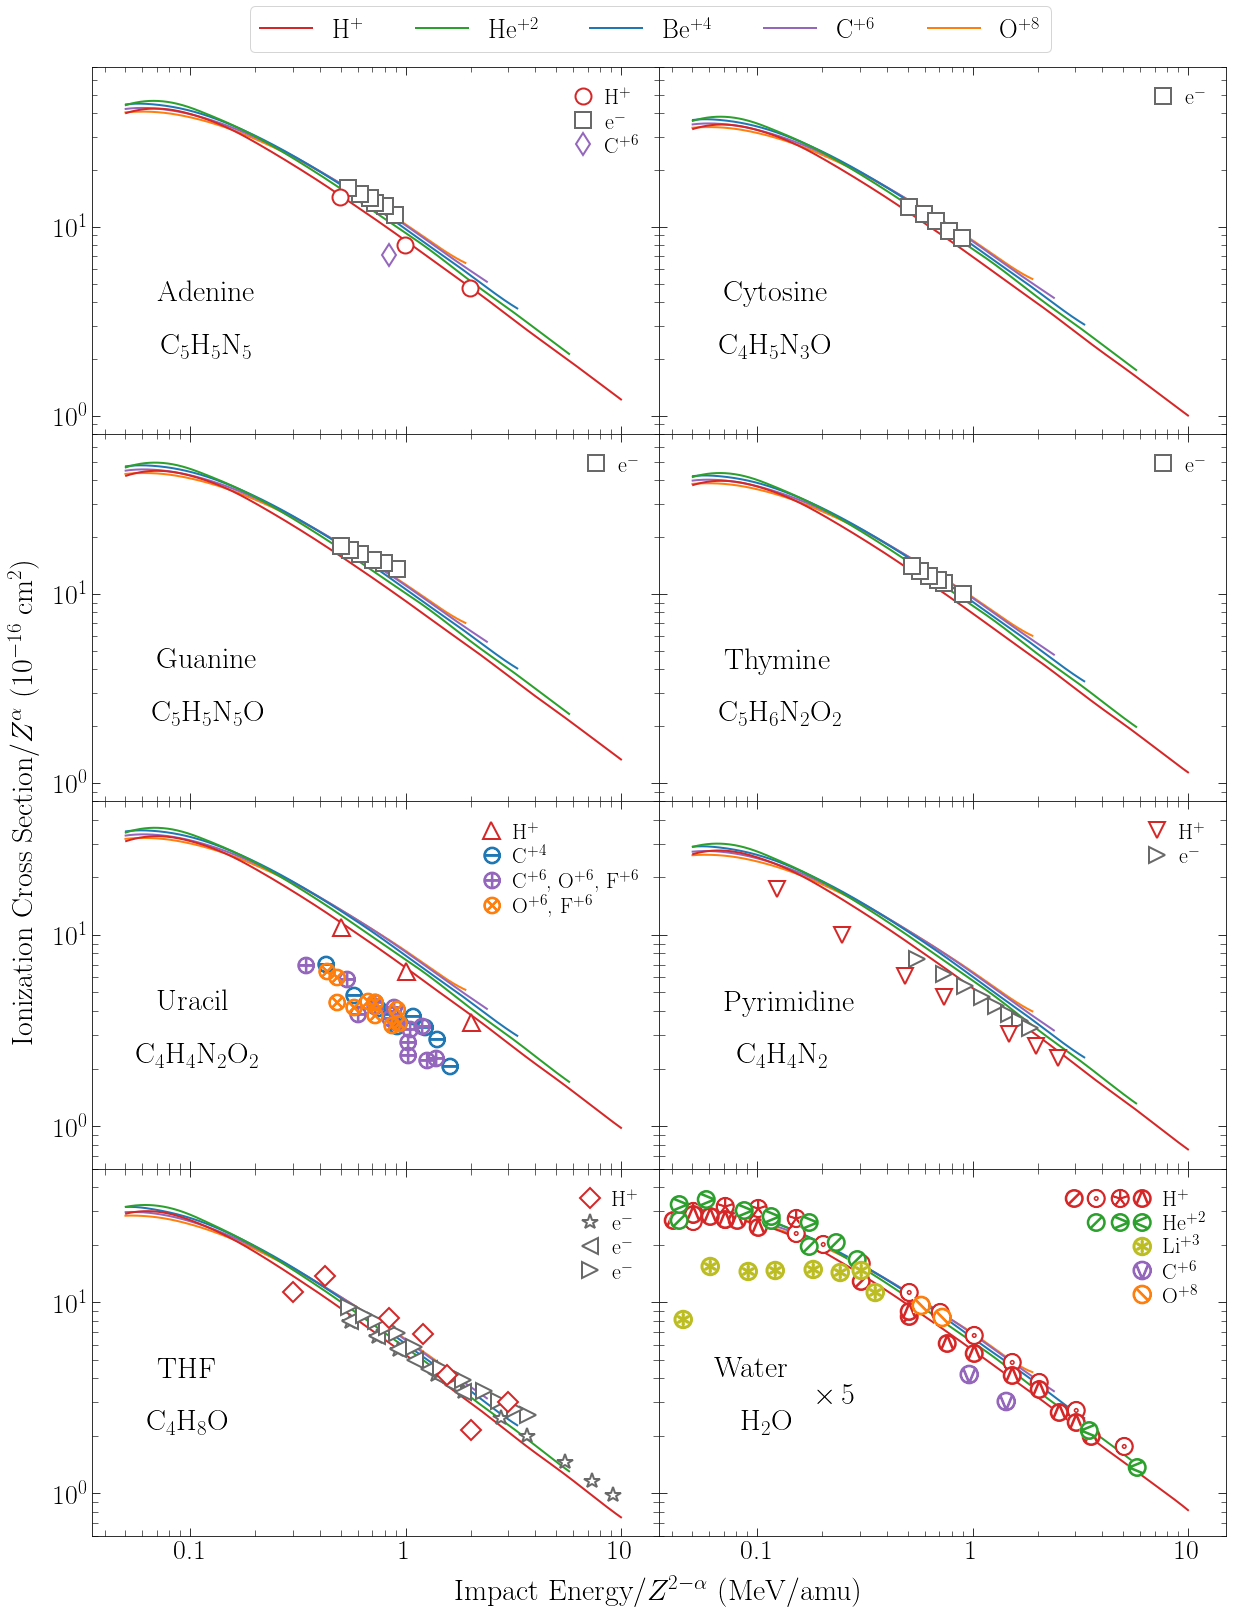

In [3]:
iwidth=2
xmin=0.035
xmax=15
ymin1=0.8
ymin2=0.6
ymax1=70
ymax2=50
xtext=0.07
ytext=0.09*45
icharge=0.07
ims=16
imew=2

fig = plt.figure(figsize=(18,24))

### ADENINA ###########################################################
ax1 = plt.subplot(421)
plt.text(xtext, ytext, 'Adenine',fontsize=imolsize)
plt.text(xtext*1.05, ytext*0.5, r'C$_5$H$_5$N$_5$',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLADENINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLADENINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLADENINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLADENINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLADENINA'][iPe100:]*convcm2,
         co_p,linewidth=iwidth,label=r'H$^{+}$')

# legend1=ax1.legend(loc='upper left',bbox_to_anchor=(0.1, 1.075, 0, 0),fontsize=ilegsize,ncol=5)

# experimentos #
Ae, = ax1.plot(A_e['Ep'][0:iAe]/1000.,A_e['CS'][0:iAe],color='dimgray',
               marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=6,
               linestyle=' ',label='_nolegend_')
Ap, = ax1.plot(A_p['E']/1000.,A_p['CS'],color=co_p,marker='o',
               markersize=ims,markeredgewidth=imew,markerfacecolor='white',
               linestyle=' ',label='_nolegend_')
AC, = ax1.plot(A_C[0]/6**(2-alpha),A_C[1]/6**(alpha),color=co_c,marker='d',
               markersize=ims,markeredgewidth=imew,markerfacecolor='white',
               linestyle=' ',label='_nolegend_')

handles, labels = ax1.get_legend_handles_labels()
legend1=ax1.legend(handles[::-1], labels[::-1],loc='upper left',bbox_to_anchor=(0.255, 1.2, 0, 0),
                   fontsize=ilegsize,ncol=6)
ax1.legend([Ap,Ae,AC],['H$^{+}$','e$^{-}$',r'C$^{+6}$'],loc='best',fontsize=22,handletextpad=0.01,
           labelspacing=0.1,frameon=False)
ax1.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax1.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
plt.gca().add_artist(legend1)
# ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### CITOSINA ###########################################################
ax2 = plt.subplot(422)
plt.text(xtext, ytext, 'Cytosine',fontsize=imolsize)
plt.text(xtext*0.95, ytext*0.5, r'C$_4$H$_5$N$_3$O',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLCITOSINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLCITOSINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLCITOSINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLCITOSINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLCITOSINA'][iPe100:]*convcm2,co_p,linewidth=iwidth, 
         label='_nolegend_')

# experimentos #
Cite,=plt.plot(C_e['Ep'][iCe:]/1000,C_e['CS'][iCe:],color='dimgray',
         marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=4,
         linestyle=' ',label='e')

ax2.legend([Cite],['e$^{-}$'],loc='best',fontsize=22,handletextpad=0.01,labelspacing=0.1,frameon=False)
ax2.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax2.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
# ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### GUANINA ###########################################################
ax3 = plt.subplot(423)
plt.text(xtext, ytext, 'Guanine',fontsize=imolsize)
plt.text(xtext*0.95, ytext*0.5, r'C$_5$H$_5$N$_5$O',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLGUANINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLGUANINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLGUANINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLGUANINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLGUANINA'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experimentos #
Guane,=plt.plot(G_e['Ep'][0:iGe]/1000,G_e['CS'][0:iGe],color='dimgray',
         marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=4,
         linestyle=' ')

ax3.legend([Guane],['e$^{-}$'],loc='best',fontsize=22,handletextpad=0.01,labelspacing=0.1,frameon=False)
ax3.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax3.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
ax3.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
# ax3.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### TIMINA ###########################################################
ax4 = plt.subplot(424)
plt.text(xtext, ytext, 'Thymine',fontsize=imolsize)
plt.text(xtext*0.95, ytext*0.5, r'C$_5$H$_6$N$_2$O$_2$',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLTIMINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLTIMINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLTIMINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLTIMINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLTIMINA'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experimentos #
Tyme, = plt.plot(T_e['Ep'][0:iTe]/1000,T_e['CS'][0:iTe],color='dimgray',
         marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=4,
         linestyle=' ')

ax4.legend([Tyme],['e$^{-}$'],loc='best',fontsize=22,handletextpad=0.01,labelspacing=0.1,frameon=False)
ax4.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True,
                left=True, right=True);
ax4.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
ax4.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### URACILO ###########################################################
ax5 = plt.subplot(425)
plt.text(xtext, ytext, 'Uracil',fontsize=imolsize)
plt.text(xtext*0.8, ytext*0.5, r'C$_4$H$_4$N$_2$O$_2$',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLURACILO'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLURACILO'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLURACILO'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLURACILO'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLURACILO'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label=r'H$^{+}$')

# experiments
Up, = ax5.plot(U_p['E']/1000,U_p['CS'],color=co_p,
               marker='^',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
               label='_nolegend_')
Uc4, = ax5.plot(U_c4[1]/1000/4**(2-alpha),U_c4[3]*4**(2-alpha),color=co_be,
                marker=r'$\ominus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uc6, = ax5.plot(U_c6[1]/1000/6**(2-alpha),U_c6[2]*6**(2-alpha),color=co_c,
                marker=r'$\oplus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uo6, = ax5.plot(U_o6[1]/1000/6**(2-alpha),U_o6[3]*6**(2-alpha),color=co_c,
                marker=r'$\oplus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uf6, = ax5.plot(U_f6[1]/1000/6**(2-alpha),U_f6[2]*6**(2-alpha),color=co_c,
                marker=r'$\oplus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uof8, = ax5.plot(U_of8[0]/1000/8**(2-alpha),U_of8[1]*8**(2-alpha),color=co_o,
                 marker=r'$\otimes$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                 linestyle=' ',label='_nolegend_')

ax5.legend([Up,Uc4,Uc6,Uof8],['H$^{+}$','C$^{+4}$','C$^{+6}$, O$^{+6}$, F$^{+6}$','O$^{+6}$, F$^{+6}$'],
           loc='upper right',fontsize=22,handletextpad=0.01,labelspacing=0.1,frameon=False)

plt.ylabel(r"Ionization Cross Section/$Z^{\alpha}$ ($10^{-16}$ cm$^2$)", fontsize=ilabelsize,
           labelpad=15,position=(1,1))
ax5.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True,
                left=True, right=True);
ax5.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')
# ax5.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### PYRIMIDINA ###########################################################
ax6 = plt.subplot(426)
plt.text(xtext, ytext, 'Pyrimidine',fontsize=imolsize)
plt.text(xtext*1.15, ytext*0.5, r'C$_4$H$_4$N$_2$',fontsize=imolsize)

plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/8**(2-alpha),OS3int['SLC4H4N2'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/6**(2-alpha),CS3int['SLC4H4N2'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/4**(2-alpha),BeS3int['SLC4H4N2'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/2**(2-alpha),HeS3int['SLC4H4N2'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS3int['ENERGY'][iPe100:]),PS3int['SLC4H4N2'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experiments
PYRe, = ax6.plot(bug17['Ep(keV)']/1000,bug17['e+PY'],color='dimgray',
                 marker='>',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                 label='p')
PYRp, = ax6.plot(PYR_p['E']/1000,PYR_p['au']*convcm2,color=co_p,
                 marker='v',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                 label='p')

ax6.legend([PYRp,PYRe],['H$^{+}$','e$^{-}$'],loc='best',fontsize=22,handletextpad=0.01,labelspacing=0.1,
           frameon=False)
ax6.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True,
                left=True, right=True);
ax6.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')

### THF ###########################################################
ax7 = plt.subplot(427)
plt.text(xtext, ytext, 'THF',fontsize=imolsize)
plt.text(xtext*0.9, ytext*0.5, r'C$_4$H$_8$O',fontsize=imolsize)

plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/8**(2-alpha),OS3int['SLC4H8O1'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/6**(2-alpha),CS3int['SLC4H8O1'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/4**(2-alpha),BeS3int['SLC4H8O1'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/2**(2-alpha),HeS3int['SLC4H8O1'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS3int['ENERGY'][iPe100:]),PS3int['SLC4H8O1'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experiments
THFe09, = ax7.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS'],color='dimgray',
                   marker='*',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                   label='p')
THFe17, = ax7.plot(bug17['Ep(keV)']/1000,bug17['e+THF'],color='dimgray',
                   marker='<',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                   label='p')
THFe19, = ax7.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]*convcm2,color='dimgray',
                   marker='>',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                   label='p')
THFp, = ax7.plot(THF_p['Ep']/1000,THF_p['au']*convcm2,color=co_p,
                 marker='D',markersize=ims-2,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                 label='p')

ax7.legend([THFp,THFe09,THFe17,THFe19],['H$^+$','e$^{-}$','e$^{-}$','e$^{-}$'],loc='upper right',
           fontsize=22,handletextpad=0.01,labelspacing=0.1,frameon=False)
ax7.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax7.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')
ax7.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
# ax7.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### WATER ###########################################################
ax8 = plt.subplot(428)
plt.text(xtext*0.9, ytext, 'Water',fontsize=imolsize)
plt.text(xtext*1.2, ytext*0.5, r'H$_2$O',fontsize=imolsize)
plt.text(xtext*2.7, ytext*0.75, r'$\times\,5$',fontsize=imolsize)

plt.plot(convMeV(OS4int['Energy'][iOe100:])/8**(2-alpha),OS4int['H2O'][iOe100:]*convcm2/8**(alpha)*5,
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS4int['Energy'][iCe100:])/6**(2-alpha),CS4int['H2O'][iCe100:]*convcm2/6**(alpha)*5,
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS4int['Energy'][iBe100:])/4**(2-alpha),BeS4int['H2O'][iBe100:]*convcm2/4**(alpha)*5,
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS4int['Energy'][iHe100:])/2**(2-alpha),HeS4int['H2O'][iHe100:]*convcm2/2**(alpha)*5,
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS4int['Energy'][iPe100:])/1**(2-alpha),PS4int['H2O'][iPe100:]*convcm2/1**(alpha)*5,
         co_p,linewidth=iwidth, label='_nolegend_')

# experiments
ax8.plot(H2O_p80['E'],H2O_p80['TCS']*5*10,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op80, = ax8.plot(H2O_p80['E'],H2O_p80['TCS']*5*10,color=co_p,
                    marker=r'$\varoslash$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_p85['E'],H2O_p85['TCS']*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op85, = ax8.plot(H2O_p85['E'],H2O_p85['TCS']*5,color=co_p,
                    marker=r'$\odot$',markersize=ims+3,markeredgewidth=imew-0.5,markerfacecolor='white',linestyle=' ',label='__none__')

ax8.plot(H2O_p86['E'],H2O_p86['TCS']*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op86, = ax8.plot(H2O_p86['E'],H2O_p86['TCS']*5,color=co_p,
                    marker=r'$\logof$',markersize=ims+3,markeredgewidth=imew-0.5,markerfacecolor='white',linestyle=' ',label='__none__')

ax8.plot(H2O_p07['E'],H2O_p07['TCS']*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ',label='__none__')
H2Op07, = ax8.plot(H2O_p07['E'],H2O_p07['TCS']*5,color=co_p,
                    marker=r'$\varowedge$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_he2_80['E']/2**(2-alpha),H2O_he2_80['TCS']/2**(alpha)*5*10,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Ohe_80, = ax8.plot(H2O_he2_80['E']/2**(2-alpha),H2O_he2_80['TCS']/2**(alpha)*5*10,color=co_he,
                    marker=r'$\varoslash$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Ohe_85, = ax8.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)*5,color=co_he,
                    marker=r'$\varogreaterthan$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Ohe_05, = ax8.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)*5,color=co_he,
                    marker=r'$\varolessthan$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oli16, = ax8.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)*5,color='tab:olive',
                    marker=r'$\varoast$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oc6_09, = ax8.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)*5,color=co_c,
                    marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oc6_17, = ax8.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)*5,color=co_c,
                    marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)*5,color='white',
         marker='s',markersize=ims-3,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oo, = ax8.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)*5,color=co_o,
                    marker=r'$\obslash$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8.legend([(H2Op80,H2Op85,H2Op86,H2Op07),(H2Ohe_80,H2Ohe_85,H2Ohe_05),H2Oli16,H2Oc6_09,H2Oo],[r'H$^+$',r'He$^{+2}$',r'Li$^{+3}$','C$^{+6}$','O$^{+8}$'],
           loc='upper right',fontsize=22,handletextpad=0.01,labelspacing=0.1,frameon=False,
           handler_map={H2Op80:HandlerXoffset(x_offset=68,numpoints=1),
                        H2Op85:HandlerXoffset(x_offset=46,numpoints=1),
                        H2Op86:HandlerXoffset(x_offset=22,numpoints=1),
                        H2Op07:HandlerXoffset(x_offset=0,numpoints=1),
                        H2Ohe_80:HandlerXoffset(x_offset=46,numpoints=1),
                        H2Ohe_85:HandlerXoffset(x_offset=22,numpoints=1),
                        H2Ohe_05:HandlerXoffset(x_offset=0,numpoints=1)})

plt.xlabel(r"Impact Energy/$Z^{2-\alpha}$ (MeV/amu)", fontsize=ilabelsize,labelpad=10,position=(0,0))
ax8.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, left=True, right=True);
ax8.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);

plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')
ax8.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

for ax in fig.get_axes():
    ax.label_outer()
fig.subplots_adjust(hspace=0.0, wspace=0.0)

plt.subplots_adjust(left=0.1, right=0.975, top=0.925, bottom=0.075)
plt.savefig('../zscale_alpha.eps')
plt.show()

In [4]:
Zch=[1,2,4,6,8]

# Universal curve

In [ ]:
ymin=0.02
ymax=2
xmin=0.02
xmax=15
xtext=5
ytext=10
icharge=65/1000
iwidth=0.5
ims=20
imew=1.0

fig = plt.figure(figsize=(16,14))

ax1 = plt.subplot(111)
plt.text(5., 1.2, r'$\alpha=1.2$',fontsize=imolsize+4)
plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int['SLURACILO'][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[0],
         co_p,linewidth=iwidth, label=r'H$^+$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int['SLURACILO'][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[0],
         co_he,linewidth=iwidth, label=r'He$^{+2}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int['SLURACILO'][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[0],
         co_be,linewidth=iwidth, label=r'Be$^{+4}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int['SLURACILO'][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[0],
         co_c,linewidth=iwidth, label=r'C$^{+6}$')
plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int['SLURACILO'][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[0],
         co_o,linewidth=iwidth, label=r'O$^{+8}$')

ax1.legend(loc='upper left',bbox_to_anchor=(0.09, 1.09, 0, 0),fontsize=ilegsize,ncol=5)

it=0
for i in head_adn[1:]:
    plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[it],
             co_p,linewidth=iwidth)
    plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[it],
             co_he,linewidth=iwidth)
    plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[it],
             co_be,linewidth=iwidth)
    plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[it],
             co_c,linewidth=iwidth)
    plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[it],
             co_o,linewidth=iwidth)
    it=it+1

it=0
for i in head_CHn[1:]:
    plt.plot(convMeV(PS2int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS2int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_CHn[it],
             co_p,linewidth=iwidth)
    plt.plot(convMeV(HeS2int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS2int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_CHn[it],
             co_he,linewidth=iwidth)
    plt.plot(convMeV(BeS2int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS2int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_CHn[it],
             co_be,linewidth=iwidth)
    plt.plot(convMeV(CS2int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS2int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_CHn[it],
             co_c,linewidth=iwidth)
    plt.plot(convMeV(OS2int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS2int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_CHn[it],
             co_o,linewidth=iwidth)
    it=it+1

it=0
for i in head_PYR[1:]:
    plt.plot(convMeV(PS3int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS3int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_PYR[it],
             co_p,linewidth=iwidth)
    plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS3int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_PYR[it],
             co_he,linewidth=iwidth)
    plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS3int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_PYR[it],
             co_be,linewidth=iwidth)
    plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS3int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_PYR[it],
             co_c,linewidth=iwidth)
    plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS3int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_PYR[it],
             co_o,linewidth=iwidth)
    it=it+1

# water
plt.plot(convMeV(OS4int['Energy'][iOe100:])/8**(2-alpha),OS4int['H2O'][iOe100:]*convcm2/8**(alpha)/6,co_o,linewidth=iwidth)
plt.plot(convMeV(CS4int['Energy'][iCe100:])/6**(2-alpha),CS4int['H2O'][iCe100:]*convcm2/6**(alpha)/6,co_c,linewidth=iwidth)
plt.plot(convMeV(BeS4int['Energy'][iBe100:])/4**(2-alpha),BeS4int['H2O'][iBe100:]*convcm2/4**(alpha)/6,co_be,linewidth=iwidth)
plt.plot(convMeV(HeS4int['Energy'][iHe100:])/2**(2-alpha),HeS4int['H2O'][iHe100:]*convcm2/2**(alpha)/6,co_he,linewidth=iwidth)
plt.plot(convMeV(PS4int['Energy'][iPe100:])/1**(2-alpha),PS4int['H2O'][iPe100:]*convcm2/1**(alpha)/6,co_p,linewidth=iwidth)

# experiments:

# electrons
Ae, = plt.plot(A_e['Ep'][0:iAe]/1000.,A_e['CS'][0:iAe]/45,color='dimgray',
               marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=6,
               linestyle=' ')
Cite,=plt.plot(C_e['Ep'][iCe:]/1000,C_e['CS'][iCe:]/37,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ',label='e')
Tyme, = plt.plot(T_e['Ep'][0:iTe]/1000,T_e['CS'][0:iTe]/42,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
Guane,=plt.plot(G_e['Ep'][0:iGe]/1000,G_e['CS'][0:iGe]/49,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
PYRe, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+PY']/28,color='dimgray',
        marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
        linestyle=' ')
THFe09, = plt.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS']/28,color='dimgray',
          marker='*',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe17, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+THF']/28,color='dimgray',
          marker='<',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe19, = plt.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]/28*convcm2,color='dimgray',
          marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')

# gases + H1+
plt.plot(gasesH1['E'],gasesH1['N2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2p, = plt.plot(gasesH1['E'],gasesH1['N2'],color=co_p,
                marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['O2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2p, = plt.plot(gasesH1['E'],gasesH1['O2'],color=co_p,
                marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COp, = plt.plot(gasesH1['E'],gasesH1['CO'],color=co_p,
                marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2p, = plt.plot(gasesH1['E'],gasesH1['CO2'],color=co_p,
                 marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_p['E'],CH4_p['TCS']/8,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p, = plt.plot(CH4_p['E'],CH4_p['TCS']/8,color=co_p,
                   marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# gases + He2+
plt.plot(gasesHe2['E'],gasesHe2['N2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2he, = plt.plot(gasesHe2['E'],gasesHe2['N2'],color=co_he,
                 marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COhe, = plt.plot(gasesHe2['E'],gasesHe2['CO'],color=co_he,
                 marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['O2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2he, = plt.plot(gasesHe2['E'],gasesHe2['O2'],color=co_he,
                 marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2he, = plt.plot(gasesHe2['E'],gasesHe2['CO2'],color=co_he,
                  marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4he85, = plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color=co_he,
                    marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# methane
plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_he,
         marker='o',markersize=ims-1,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p19, = plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_p,
                    marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# water
plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op85, = plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color=co_p,
                   marker=r'$\odot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op86, = plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color=co_p,
                    marker=r'$\logof$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op07, = plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color=co_p,
                   marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_85, = plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color=co_he,
                     marker=r'$\varogreaterthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_05, = plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color=co_he,
                     marker=r'$\varogreaterthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='white',
#          marker='o',markersize=ims-2,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
# H2Oli16, = plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='tab:olive',
#                     marker=r'$\varoast$',markersize=ims,markeredgewidth=imew*1.,linestyle=' ')

plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_09, = plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color=co_c,
                     marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_17, = plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color=co_c,
                     marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Oo, = plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color=co_o,
                 marker=r'$\obslash$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# DNA and RNA
Ap, = plt.plot(A_p['E']/1000,A_p['CS']/45,color=co_p,
               marker='o',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
Up, = plt.plot(U_p['E']/1000,U_p['CS']/36,color=co_p,
               marker='^',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
PYRp, = plt.plot(PYR_p['E']/1000,PYR_p['au']/28*convcm2,color=co_p,
                 marker='v',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
THFp, = plt.plot(THF_p['Ep']/1000,THF_p['au']/28*convcm2,color=co_p,
                 marker='D',markersize=ims-4,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
AC, = plt.plot(A_C[0]/6**(2-alpha),A_C[1]/6**(alpha)/45,color=co_c,
               marker='d',markersize=ims-3,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')

plt.xlabel(r"Impact Energy/Z$^{2-\alpha}$ (MeV/amu)", fontsize=ilabelsize,labelpad=5)
plt.ylabel(r"$\sigma_e/Z^{\alpha}$ ($10^{-16}$ cm$^2$)", fontsize=ilabelsize,labelpad=15)
ax1.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, left=True, right=True);
ax1.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax) 
plt.yscale('log')
plt.xscale('log')
ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
# ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

plt.subplots_adjust(left=0.1, right=0.975)

plt.savefig("../zmol_alpha.eps")
plt.show()

In [30]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np

def f(alpha):
    fig = plt.figure(figsize=(18,9))

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    ax1 = plt.subplot(111)
    it=0
    for i in head_adn[1:]:
        plt.plot(convMeV(PS1int['ENERGY'][ie100:])/Zch[0]**(2-alpha),PS1int[i][ie100:]*convcm2/Zch[0]**alpha/ne_adn[it],
                 co_p,linewidth=1)
        plt.plot(convMeV(HeS1int['ENERGY'][ie100:])/Zch[1]**(2-alpha),HeS1int[i][ie100:]*convcm2/Zch[1]**alpha/ne_adn[it],
                 co_he,linewidth=1)
        plt.plot(convMeV(BeS1int['ENERGY'][ie100:])/Zch[2]**(2-alpha),BeS1int[i][ie100:]*convcm2/Zch[2]**alpha/ne_adn[it],
                 co_be,linewidth=1)
        plt.plot(convMeV(CS1int['ENERGY'][ie100:])/Zch[3]**(2-alpha),CS1int[i][ie100:]*convcm2/Zch[3]**alpha/ne_adn[it],
                 co_c,linewidth=1)
        plt.plot(convMeV(OS1int['ENERGY'][ie100:])/Zch[4]**(2-alpha),OS1int[i][ie100:]*convcm2/Zch[4]**alpha/ne_adn[it],
                 co_o,linewidth=1)
        it=it+1
#     for i in head_CHn[1:]:
#         plt.plot(convMeV(PS2int['ENERGY'][ie100:])/Zch[0]**(2-alpha),PS2int[i][ie100:]*convcm2/Zch[0]**alpha,
#                  co_p,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(HeS2int['ENERGY'][ie100:])/Zch[1]**(2-alpha),HeS2int[i][ie100:]*convcm2/Zch[1]**alpha,
#                  co_he,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(BeS2int['ENERGY'][ie100:])/Zch[2]**(2-alpha),BeS2int[i][ie100:]*convcm2/Zch[2]**alpha,
#                  co_be,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(CS2int['ENERGY'][ie100:])/Zch[3]**(2-alpha),CS2int[i][ie100:]*convcm2/Zch[3]**alpha,
#                  co_c,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(OS2int['ENERGY'][ie100:])/Zch[4]**(2-alpha),OS2int[i][ie100:]*convcm2/Zch[4]**alpha,
#                  co_o,linewidth=1, label='_nolegend_')
#     for i in head_PYR[1:]:
#         plt.plot(convMeV(PS3int['ENERGY'][ie100:])/Zch[0]**(2-alpha),PS3int[i][ie100:]*convcm2/Zch[0]**alpha,
#                  co_p,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(HeS3int['ENERGY'][ie100:])/Zch[1]**(2-alpha),HeS3int[i][ie100:]*convcm2/Zch[1]**alpha,
#                  co_he,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(BeS3int['ENERGY'][ie100:])/Zch[2]**(2-alpha),BeS3int[i][ie100:]*convcm2/Zch[2]**alpha,
#                  co_be,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(CS3int['ENERGY'][ie100:])/Zch[3]**(2-alpha),CS3int[i][ie100:]*convcm2/Zch[3]**alpha,
#                  co_c,linewidth=1, label='_nolegend_')
#         plt.plot(convMeV(OS3int['ENERGY'][ie100:])/Zch[4]**(2-alpha),OS3int[i][ie100:]*convcm2/Zch[4]**alpha,
#                  co_o,linewidth=1, label='_nolegend_')
    # experiments
    Ap, = plt.plot(A_p['E']/1000,A_p['CS']/45,color=co_p,marker='o',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')
    Up, = plt.plot(U_p['E']/1000,U_p['CS']/36,color=co_p,marker='^',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')
    PYRp, = plt.plot(PYR_p['E'][2:]/1000,PYR_p['au'][2:]/28*convcm2,color=co_p,marker='v',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')
    PYRe, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+PY']/28,color='dimgray',marker='>',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')
    THFp, = plt.plot(THF_p['Ep']/1000,THF_p['au']/28*convcm2,color=co_p,marker='D',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')
    THFe09, = plt.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS']/28,color='dimgray',marker='*',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')
    THFe17, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+THF']/28,color='dimgray',marker='<',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')
    THFe19, = plt.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]/28*convcm2,color='dimgray',marker='>',markersize=14,markeredgewidth=1.5,markerfacecolor='none',linestyle=' ',label='_nolegend_')

    plt.xlabel(r"Impact Energy/Z$^{2-\alpha}$ (MeV/amu)", fontsize=ilabelsize,labelpad=5)
    plt.ylabel(r"$\sigma_e/Z^{\alpha}$ ($10^{-16}$ cm$^2$)", fontsize=ilabelsize,labelpad=15)
    ax1.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, left=True, right=True);
    ax1.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
    # plt.xlim(xmin,xmax)
    # plt.ylim(ymin,ymax)
    plt.yscale('log')
    plt.xscale('log')
    ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
    ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.show()



interactive_plot = interactive(f, alpha=widgets.FloatSlider(
    value=1.0,
    min=0.8,
    max=1.30,
    step=0.01,))
output = interactive_plot.children[-1]
output.layout.height = '540px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='alpha', max=1.3, min=0.8, step=0.01), Output(layout=…

# Compute relative error of theoretical prediction

In [21]:
nA_p=len(A_p)
print('Adenine + p:\n')
print('E',' '*8,'yexp',' '*5,'ytheo',' '*14,'Er%')
erp_Ap=[]
xerp_Ap=A_p['E']/1000
for i in range(nA_p):
    xexp=A_p.iloc[i]['E']/1000
    yexp=A_p.iloc[i]['CS']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS1int,'SLADENINA',1)
    erp_Ap.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_Ap))

Adenine + p:

E          yexp       ytheo                Er%
1.9972   4.7444    4.7768250609814595    -0.678799423623809
0.99309   8.0277    8.48167732545888    -5.352447494037625
0.4938   14.433    14.731091877078297    -2.023555888223947

Erp avg =  -2.68493426862846


In [22]:
nA_e=len(A_e[0:iAe])
print('Adenine + e:\n')
print('E',' '*18,'yexp',' '*8,'ytheo',' '*14,'Er%')
erp_Ae=[]
xerp_Ae=A_e[0:iAe]['Ep']/1000
for i in range(nA_e):
    xexp=A_e.iloc[i]['Ep']/1000
    yexp=A_e.iloc[i]['CS']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS1int,'SLADENINA',1)
    erp_Ae.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_Ae))

Adenine + e:

E                    yexp          ytheo                Er%
0.8936199825876   11.4863    9.230647488239274    24.43655783231504
0.8758121915348999   11.7699    9.381961539525705    25.452443504634264
0.8669569913406   12.0541    9.459018418357413    27.434998716211727
0.8413616222793   12.1472    9.695983707077515    25.28073857151015
0.8083719129852   12.3346    10.026065692250162    23.025325971425296
0.8327471424056999   12.6213    9.776957920578932    29.092301537211114
0.8000955440963998   12.8087    10.082713841972987    27.0362344974931
0.7764241000409998   12.9967    10.343638272823918    25.649212174661333
0.7841510385795   13.0923    10.255556680884832    27.660549372249378
0.7686254966742   13.186    10.432848339693008    26.389261788003765
0.7533572131268998   13.3746    10.584083696545207    26.36521387643274
0.7310676139658999   13.5627    10.832862357451281    25.19959686066744
0.7167309731865   13.3716    11.025100638048999    21.283246647680837
0.70249356

In [23]:
print('Adenine + C:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_AC=[]
xerp_AC=A_C[0]/6**(2-alpha)
xexp=A_C[0]/6**(2-alpha)
yexp=A_C[1]/6**(alpha)
xtheo,ytheo,erp=get_error(xexp,yexp,CS1int,'SLADENINA',6)
erp_AC.append(erp)
print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_AC))

Adenine + C:

E                      yexp                 ytheo                Er%
0.8347319639780656   7.069801018239144    11.718485502012115    -39.669669625607945

Erp avg =  -39.669669625607945


In [24]:
nC_e=len(C_e[iCe:])
print('Cytosine + e:\n')
print('E',' '*16,'yexp',' '*5,'ytheo',' '*14,'Er%')
erp_Ce=[]
xerp_Ce=C_e[iCe:]['Ep']/1000
for i in range(nC_e):
    xexp=C_e.iloc[iCe+i]['Ep']/1000
    yexp=C_e.iloc[iCe+i]['CS']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS1int,'SLCITOSINA',1)
    erp_Ce.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_Ce))

Cytosine + e:

E                  yexp       ytheo                Er%
0.505861809813   12.7461    11.914996898233376    6.975269140773767
0.5263947019008   12.5078    11.555341948032131    8.242577815969101
0.5532340988789999   12.2696    11.102034976262123    10.516675782721931
0.5699908057833001   12.0313    10.850642400099915    10.880992630346139
0.5931256824062999   11.7335    10.50710276004515    11.672078097669422
0.6110915035932   11.4357    10.276919646695857    11.2755610936075
0.6358930468641   11.1379    9.961796509160926    11.80613847871237
0.6617034104103   10.8997    9.661630009374992    12.814297270995349
0.6749981548398   10.6614    9.516748333830366    12.027760176242126
0.7023943324071   10.4232    9.209221444784546    13.182206145156439
0.7165067909031   10.1254    9.074197299066808    11.584525509945637
0.7382083709601   9.88715    8.864062744805201    11.541967658051393
0.7758489438549   9.47022    8.513128543625298    11.242535003085086
0.8073392044338001   9.23

In [25]:
nG_e=len(G_e[0:iGe])
print('Guanine + e:\n')
print('E',' '*16,'yexp',' '*5,'ytheo',' '*14,'Er%')
erp_Ge=[]
xerp_Ge=G_e[0:iGe]['Ep']/1000
for i in range(nG_e):
    xexp=G_e.iloc[i]['Ep']/1000
    yexp=G_e.iloc[i]['CS']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS1int,'SLGUANINA',1)
    erp_Ge.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_Ge))

Guanine + e:

E                  yexp       ytheo                Er%
0.9121425843636   13.5487    9.8760335912319    37.187666230993294
0.8852903244674999   13.657    10.117110833173829    34.98913103945582
0.8423042904053999   13.9807    10.539183151582309    32.65449322702962
0.8094156468948001   14.1967    10.865946181674309    30.653141131354865
0.7934895169748999   14.5197    11.050700194479491    31.391674233036287
0.7549448647077   14.735999999999999    11.50067363867166    28.13162483325648
0.7254685695599999   14.9519    11.87373394359179    25.92416228148253
0.7401084076898999   15.1665    11.66805357019614    29.98311936739806
0.7041253136445   15.1677    12.156402565572844    24.77128754320136
0.6834105031464   15.3834    12.411919905885686    23.940535522673244
0.6567401616606   15.707    12.830027829984138    22.423740681935993
0.6374200589748   15.9227    13.107457490187524    21.478173871019738
0.6125450133158999   16.2462    13.520337561920295    20.16120104691049
0.60

In [26]:
nT_e=len(T_e[0:iTe])
print('Thymine + e:\n')
print('E',' '*10,'yexp',' '*7,'ytheo',' '*14,'Er%')
erp_Te=[]
xerp_Te=T_e[0:iTe]['Ep']/1000
for i in range(nT_e):
    xexp=T_e.iloc[i]['Ep']/1000
    yexp=T_e.iloc[i]['CS']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS1int,'SLTIMINA',1)
    erp_Te.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_Te))

Thymine + e:

E            yexp         ytheo                Er%
0.9065068   9.96764    8.546746256035744    16.62496699209731
0.88000919   10.2343    8.757262369440266    16.866431177328543
0.8457938300000001   10.4348    9.050204723832078    15.299049230586355
0.82103638   10.635    9.25370258061606    14.926970121963656
0.73632672   11.4355    10.10985486794805    13.112405166712444
0.7891822900000001   10.9684    9.544817204533455    14.914720365628305
0.7584987099999999   11.1689    9.84968298884695    13.393497157693638
0.72194781   11.7019    10.25872935505859    14.067732903293544
0.69384969   11.8359    10.566095818110625    12.017723516314232
0.68027012   12.0358    10.756937977223366    11.88871801143117
0.66035832   12.235999999999999    10.986170177932742    11.376392335317314
0.6346839400000001   12.4365    11.326959857200904    9.795568773855294
0.62842889   12.5032    11.432454316159966    9.365842663604761
0.60402058   12.7702    11.795738863212284    8.261128430257111

In [27]:
nUp=len(U_p)
print('Uracil + p:\n')
print('E',' '*3,'yexp',' '*5,'ytheo',' '*14,'Er%')
erp_Up=[]
xerp_Up=U_p['E']/1000
for i in range(nUp):
    xexp=U_p.iloc[i]['E']/1000
    yexp=U_p.iloc[i]['CS']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS1int,'SLURACILO',1)
    erp_Up.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_Up))

Uracil + p:

E     yexp       ytheo                Er%
0.5   11.0    11.632748852315622    -5.4393751670282695
1.0   6.5    6.754302796803484    -3.765048805982374
2.0   3.5    3.8325487221963415    -8.676960067601328

Erp avg =  -5.960461346870656


In [28]:
iUC4=11
nUC4=len(U_c4[iUC4:])
print('Uracil + C+4:\n')
print('E',' '*20,'yexp',' '*18,'ytheo',' '*15,'Er%')
erp_UC4=[]
xerp_UC4=U_c4[iUC4:][1]/1000/4**(2-alpha)
for i in range(nUC4):
    xexp=U_c4.iloc[iUC4+i][1]/1000/4**(2-alpha)
    yexp=U_c4.iloc[iUC4+i][3]*4**(2-alpha)
    xtheo,ytheo,erp=get_error(xexp,yexp,BeS1int,'SLURACILO',4)
    erp_UC4.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_UC4))

Uracil + C+4:

E                      yexp                    ytheo                 Er%
0.4212199128164772   7.083883259574327    15.144867198415842    -53.22584763030934
0.567025536956882   4.877575911030461    12.208022107696387    -60.04614123400499
0.7395841839882071   4.166704841337085    9.965340803991255    -58.18803467646322
0.844650001383499   3.851072023526959    8.961078666835673    -57.024459144862696
0.9019496324088118   3.356918108513239    8.492622954979069    -60.47254038818314
1.0667561704643462   3.77395236462291    7.3989683657075584    -48.993532907718965
1.2177078754567654   3.288923063339583    6.643096833755501    -50.49111663362167
1.3900026209059362   2.866220027271163    5.9762206046257385    -52.03958794538743
1.5841682099761674   2.053432175645627    5.3848441134630045    -61.86645086880592

Erp avg =  -55.81641238103972


In [29]:
nUC6=len(U_c6)
print('Uracil + C+6:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_UC6=[]
xerp_UC6=U_c6[1]/1000/6**(2-alpha)
for i in range(nUC6):
    xexp=U_c6.iloc[i][1]/1000/6**(2-alpha)
    yexp=U_c6.iloc[i][2]*6**(2-alpha)
    xtheo,ytheo,erp=get_error(xexp,yexp,CS1int,'SLURACILO',6)
    erp_UC6.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_UC6))

Uracil + C+6:

E                      yexp                 ytheo                Er%
0.5962371171271897   3.8365608820559705    11.993671116878389    -68.01178851188544
0.8347319639780656   3.6793247803323648    9.396200948136766    -60.84242130792272
1.0136030991162226   2.7685294198949904    8.079991672323521    -65.73598671669349
1.2425581520930633   2.2176160490826033    6.8646027796260425    -67.69491083061021
1.36419052398701   2.2828166192639916    6.3648372423037465    -64.1339356788057

Erp avg =  -65.28380860918352


In [30]:
iUo6=11
nUO6=len(U_o6[iUo6:])
print('Uracil + O+6:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_UO6=[]
xerp_UO6=U_o6[iUo6:][1]/1000/6**(2-alpha)
for i in range(nUO6):
    xexp=U_o6.iloc[iUo6+i][1]/1000/6**(2-alpha)
    yexp=U_o6.iloc[iUo6+i][3]*6**(2-alpha)
    xtheo,ytheo,erp=get_error(xexp,yexp,CS1int,'SLURACILO',6)
    erp_UO6.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_UO6))

Uracil + O+6:

E                      yexp                 ytheo                Er%
0.3424309011084876   6.974280668797986    17.453974252720755    -60.04187603456088
0.5280752898972094   5.858155924323146    13.052405789160426    -55.11819032482009
0.7136242807471909   4.461563904000521    10.554739468679498    -57.72928439171881
0.8714124714237305   4.210195789378384    9.08965465025918    -53.681454891596616
1.0311086208750766   3.2052684160424767    7.973502330978261    -59.80099731595331
1.1772105640559234   3.33411816020158    7.174416593974834    -53.52767550463107

Erp avg =  -56.64991307721346


In [31]:
nUF6=len(U_f6)
print('Uracil + F+6:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_UF6=[]
xerp_UF6=U_f6[1]/1000/6**(2-alpha)
for i in range(nUF6):
    xexp=U_f6.iloc[i][1]/1000/6**(2-alpha)
    yexp=U_f6.iloc[i][2]*6**(2-alpha)
    xtheo,ytheo,erp=get_error(xexp,yexp,CS1int,'SLURACILO',6)
    erp_UF6.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_UF6))

Uracil + F+6:

E                      yexp                 ytheo                Er%
0.7154845405526277   4.255857153318917    10.540732354149508    -59.62465405315467
0.8943556756907846   3.5081261127757037    8.907734574968133    -60.617078525958945
1.0136030991162226   2.35854152585408    8.079991672323521    -70.81009954585947

Erp avg =  -63.683944041657696


In [32]:
nUOF8=len(U_of8)
print('Uracil + O+8:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_UOF8=[]
xerp_UOF8=U_of8[0]/1000/8**(2-alpha)
for i in range(nUOF8):
    xexp=U_of8.iloc[i][0]/1000/8**(2-alpha)
    yexp=U_of8.iloc[i][1]*8**(2-alpha)
    xtheo,ytheo,erp=get_error(xexp,yexp,OS1int,'SLURACILO',8)
    erp_UOF8.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_UOF8))

Uracil + O+8:

E                      yexp                 ytheo                Er%
0.4736614270344993   6.020228452743115    14.064096276690098    -57.19434555691238
0.6631259978482991   4.53583483344004    11.144328347607829    -59.2991637363801
0.4262952843310494   6.472186302341047    15.07143011055929    -57.0565881614212
0.710492140551749   4.471495627710754    10.607010752340468    -57.84396063967311
0.8525905686620988   3.392771520495697    9.302175267083024    -63.52711679706287
0.9236397827172738   3.4802285048217243    8.776612721110755    -60.34656404001302
0.4736614270344993   4.483846221755587    14.064096276690098    -68.11849027806261
0.5683937124413992   4.2232697995361566    12.414949325874069    -65.98238390925675
0.710492140551749   3.8034551626446524    10.607010752340468    -64.14206366477558
0.8999567113655488   4.084721468905003    8.947358688867308    -54.347180984401675

Erp avg =  -60.78578577679593


In [33]:
# PYRp, = ax6.plot(PYR_p['E']/1000,PYR_p['au']*convcm2,color=co_p,
nPYR=len(PYR_p)
print('Pyrimidine + p:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_PYRp=[]
xerp_PYRp=PYR_p['E']/1000
for i in range(nPYR):
    xexp=PYR_p.iloc[i]['E']/1000
    yexp=PYR_p.iloc[i]['au']*convcm2
    xtheo,ytheo,erp=get_error(xexp,yexp,PS3int,'SLC4H4N2',1)
    erp_PYRp.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_PYRp))

Pyrimidine + p:

E                      yexp                 ytheo                Er%
0.12299365   17.3300373714    23.580601519114463    -26.507229438773006
0.24728662999999998   10.013215578599999    15.405906672220604    -35.004048825925445
0.48645170000000004   6.111836928599999    9.351904723048218    -34.64607361175223
0.73643577   4.7099364    6.7451899142473115    -30.173405643455826
1.48064883   3.0369373086    3.7967708891252805    -20.012626590179494
1.96641251   2.6117073372    3.0140897374448827    -13.350047121888023
2.5   2.2770218327999996    2.459678941295503    -7.426054898014403

Erp avg =  -23.87421230428406


In [34]:
# PYRe, = ax6.plot(bug17['Ep(keV)']/1000,bug17['e+PY'],color='dimgray',
nPYR=len(bug17)
print('Pyrimidine + e:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_PYRe=[]
xerp_PYRe=bug17['Ep(keV)']/1000
for i in range(nPYR):
    xexp=bug17.iloc[i]['Ep(keV)']/1000
    yexp=bug17.iloc[i]['e+PY']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS3int,'SLC4H4N2',1)
    erp_PYRe.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_PYRe))

Pyrimidine + e:

E                      yexp                 ytheo                Er%
0.55126792   7.48    8.495873399381846    -11.957256795466845
0.73502389   6.27    6.765061233220226    -7.317912080221818
0.91877986   5.41    5.650160421587513    -4.250506245272864
1.10253583   4.76    4.859902012235619    -2.0556384055501287
1.2862917999999999   4.26    4.2745899507330885    -0.341318135803564
1.47004778   3.87    3.8213249333068435    1.2737746080921426
1.65380375   3.54    3.473052421173023    1.9276293792411385
1.83755972   3.27    3.1880018321438235    2.57208659761138

Erp avg =  -2.5186426346713198


In [35]:
# THFe09, = ax7.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS'],color='dimgray',
nTHF=len(THF_e09)
print('THF + e:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_THFe09=[]
xerp_THFe09=THF_e09['Ep(kev)']/1000
for i in range(nTHF):
    xexp=THF_e09.iloc[i]['Ep(kev)']/1000
    yexp=THF_e09.iloc[i]['CS']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS3int,'SLC4H8O1',1)
    erp_THFe09.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_THFe09))

THF + e:

E                      yexp                 ytheo                Er%
0.55126792   7.9    8.600374205185478    -8.143531763573689
0.73502389   6.57    6.82752351589674    -3.7718437043408097
0.91877986   5.64    5.689516178534198    -0.8703056108886152
1.37816979   4.18    4.049365385332706    3.2260515472490607
1.83755972   3.39    3.190848282511042    6.241340855361365
2.75633958   2.49    2.2513460667601977    10.600499708302854
3.67511944   1.99    1.7508188490172167    13.661102124702523
5.51267916   1.46    1.2508475447085547    16.72085908280512
7.35023888   1.16    0.9733758366863479    19.17287817098219
9.1877986   0.978    0.8017559997175098    21.98224900650421

Erp avg =  7.881929941710422


In [36]:
# THFe17, = ax7.plot(bug17['Ep(keV)']/1000,bug17['e+THF'],color='dimgray',
nTHF=len(bug17)
print('THF + e:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_THFe17=[]
xerp_THFe17=bug17['Ep(keV)']/1000
for i in range(nTHF):
    xexp=bug17.iloc[i]['Ep(keV)']/1000
    yexp=bug17.iloc[i]['e+THF']
    xtheo,ytheo,erp=get_error(xexp,yexp,PS3int,'SLC4H8O1',1)
    erp_THFe17.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_THFe17))

THF + e:

E                      yexp                 ytheo                Er%
0.55126792   7.99    8.600374205185478    -7.097065669740986
0.73502389   6.63    6.82752351589674    -2.8930477564352524
0.91877986   5.69    5.689516178534198    0.008503736532597521
1.10253583   4.99    4.884645417335415    2.1568522106166785
1.2862917999999999   4.45    4.290087860146916    3.7274793679308886
1.47004778   4.03    3.8308281279805283    5.199185799141244
1.65380375   3.68    3.478692145484725    5.786883291083088
1.83755972   3.39    3.190848282511042    6.241340855361365

Erp avg =  1.6412664793112028


In [37]:
# THFe19, = ax7.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]*convcm2,color='dimgray',
nTHF=len(THF_e19[0:iTHFe19])
print('THF + e:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_THFe19=[]
xerp_THFe19=convMeV(THF_e19['v(au)'][0:iTHFe19])
for i in range(nTHF):
    xexp=convMeV(THF_e19.iloc[i]['v(au)'])
    yexp=THF_e19.iloc[i]['au']*convcm2
    xtheo,ytheo,erp=get_error(xexp,yexp,PS3int,'SLC4H8O1',1)
    erp_THFe19.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_THFe19))

THF + e:

E                      yexp                 ytheo                Er%
3.69869532561   2.5538832071999997    1.7410344786222385    46.68768703656037
3.2268818719225   2.746226145    1.9583707324394655    40.230146392104935
2.712347232039999   3.0349659677999994    2.2860635156488036    32.75947702348292
2.3081778922500003   3.4204835028    2.6316731440752164    29.973720729744173
1.8460857492100002   3.9022187099999996    3.1786866604146464    22.76198087077169
1.6306090086399998   4.19133936    3.5141760417647636    19.26947626377805
1.4582126009025   4.5288838685999995    3.855960298586703    17.451517077599014
1.0957390938024998   5.8319653392    4.909547024275851    18.788257050256146
0.9093210095025   6.8940924    5.736288745595483    20.183845440024573
0.8232480792900001   7.4250999264    6.219751727929006    19.379361929488763
0.7270707780625001   7.9559282399999995    6.888950291510439    15.48825152366747
0.6420978621225002   8.583441859199999    7.597922076250794    1

In [38]:
# THFp, = ax7.plot(THF_p['Ep']/1000,THF_p['au']*convcm2,color=co_p,
nTHF=len(THF_p)
print('THF + p:\n')
print('E',' '*20,'yexp',' '*15,'ytheo',' '*14,'Er%')
erp_THFp=[]
xerp_THFp=THF_p['Ep']/1000
for i in range(nTHF):
    xexp=THF_p.iloc[i]['Ep']/1000
    yexp=THF_p.iloc[i]['au']*convcm2
    xtheo,ytheo,erp=get_error(xexp,yexp,PS3int,'SLC4H8O1',1)
    erp_THFp.append(erp)
    print(xexp," ",yexp,"  ",ytheo,"  ",erp)
print('\nErp avg = ',erp_avg(erp_THFp))

THF + p:

E                      yexp                 ytheo                Er%
3.0   2.99579397    2.0895743528543864    43.36862270096803
2.0   2.1479130114    2.976165012818207    -27.829505348358147
1.55   4.1387544042    3.6703656212980924    12.761365793750365
1.2   6.8070649842    4.544271789141909    49.7944071141346
0.84   8.2805918286    6.132127178026983    35.03620502639816
0.42   13.675675564199999    10.674935371132836    28.110148574592454
0.3   11.3560122858    13.729159153009356    -17.28544946388195

Erp avg =  17.707970628229074


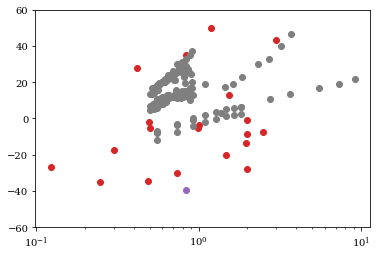

In [43]:
# protons
plt.plot(xerp_Ap,erp_Ap,'o',color=co_p)
plt.plot(xerp_Up,erp_Up,'o',color=co_p)
plt.plot(xerp_PYRp,erp_PYRp,'o',color=co_p)
plt.plot(xerp_THFp,erp_THFp,'o',color=co_p)
# heavier ions
plt.plot(xerp_AC,erp_AC,'o',color=co_c)
# plt.plot(xerp_UC4,erp_UC4,'o',color=co_be)
# plt.plot(xerp_UC6,erp_UC6,'o',color=co_c)
# plt.plot(xerp_UO6,erp_UO6,'o',color=co_c)
# plt.plot(xerp_UF6,erp_UF6,'o',color=co_c)
# plt.plot(xerp_UOF8,erp_UOF8,'o',color=co_o)
# electrons
plt.plot(xerp_Ae,erp_Ae,'o',color='tab:gray')
plt.plot(xerp_Ce,erp_Ce,'o',color='tab:gray')
plt.plot(xerp_Ge,erp_Ge,'o',color='tab:gray')
plt.plot(xerp_Te,erp_Te,'o',color='tab:gray')
plt.plot(xerp_PYRe,erp_PYRe,'o',color='tab:gray')
plt.plot(xerp_THFe09,erp_THFe09,'o',color='tab:gray')
plt.plot(xerp_THFe17,erp_THFe17,'o',color='tab:gray')
plt.plot(xerp_THFe19,erp_THFe19,'o',color='tab:gray')
plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.1,500)
plt.ylim(-60,60)
plt.show()

In [5]:
scaledPS1int =PS1int.copy()
scaledHeS1int=HeS1int.copy()
scaledBeS1int=BeS1int.copy()
scaledCS1int =CS1int.copy()
scaledOS1int =OS1int.copy()
scaledPS2int =PS2int.copy()
scaledHeS2int=HeS2int.copy()
scaledBeS2int=BeS2int.copy()
scaledCS2int =CS2int.copy()
scaledOS2int =OS2int.copy()
scaledPS3int =PS3int.copy()
scaledHeS3int=HeS3int.copy()
scaledBeS3int=BeS3int.copy()
scaledCS3int =CS3int.copy()
scaledOS3int =OS3int.copy()
scaledPS4int =PS4int.copy()
scaledHeS4int=HeS4int.copy()
scaledBeS4int=BeS4int.copy()
scaledCS4int =CS4int.copy()
scaledOS4int =OS4int.copy()

it=0
for i in head_adn[1:]:
    scaledPS1int[i] =PS1int[i]*convcm2/Zch[0]**alpha/ne_adn[it]
    scaledHeS1int[i]=HeS1int[i]*convcm2/Zch[1]**alpha/ne_adn[it]
    scaledBeS1int[i]=BeS1int[i]*convcm2/Zch[2]**alpha/ne_adn[it]
    scaledCS1int[i] =CS1int[i]*convcm2/Zch[3]**alpha/ne_adn[it]
    scaledOS1int[i] =OS1int[i]*convcm2/Zch[4]**alpha/ne_adn[it]
    it=it+1
it=0
for i in head_CHn[1:]:
    scaledPS2int[i] =PS2int[i]*convcm2/Zch[0]**alpha/ne_CHn[it]
    scaledHeS2int[i]=HeS2int[i]*convcm2/Zch[1]**alpha/ne_CHn[it]
    scaledBeS2int[i]=BeS2int[i]*convcm2/Zch[2]**alpha/ne_CHn[it]
    scaledCS2int[i] =CS2int[i]*convcm2/Zch[3]**alpha/ne_CHn[it]
    scaledOS2int[i] =OS2int[i]*convcm2/Zch[4]**alpha/ne_CHn[it]
    it=it+1

it=0
for i in head_PYR[1:]:
    scaledPS3int[i] =PS3int[i]*convcm2/Zch[0]**alpha/ne_PYR[it]
    scaledHeS3int[i]=HeS3int[i]*convcm2/Zch[1]**alpha/ne_PYR[it]
    scaledBeS3int[i]=BeS3int[i]*convcm2/Zch[2]**alpha/ne_PYR[it]
    scaledCS3int[i] =CS3int[i]*convcm2/Zch[3]**alpha/ne_PYR[it]
    scaledOS3int[i] =OS3int[i]*convcm2/Zch[4]**alpha/ne_PYR[it]
    it=it+1
    

scaledPS1int['SUM'] =scaledPS1int[head_adn[1:]].sum(axis=1)#/(len(head_adn[1:]))
scaledHeS1int['SUM']=scaledHeS1int[head_adn[1:]].sum(axis=1)#/(len(head_adn[1:]))
scaledBeS1int['SUM']=scaledBeS1int[head_adn[1:]].sum(axis=1)#/(len(head_adn[1:]))
scaledCS1int['SUM'] =scaledCS1int[head_adn[1:]].sum(axis=1)#/(len(head_adn[1:]))
scaledOS1int['SUM'] =scaledOS1int[head_adn[1:]].sum(axis=1)#/(len(head_adn[1:]))

scaledPS2int['SUM'] =scaledPS2int[head_CHn[1:]].sum(axis=1)#/(len(head_CHn[1:]))
scaledHeS2int['SUM']=scaledHeS2int[head_CHn[1:]].sum(axis=1)#/(len(head_CHn[1:]))
scaledBeS2int['SUM']=scaledBeS2int[head_CHn[1:]].sum(axis=1)#/(len(head_CHn[1:]))
scaledCS2int['SUM'] =scaledCS2int[head_CHn[1:]].sum(axis=1)#/(len(head_CHn[1:]))
scaledOS2int['SUM'] =scaledOS2int[head_CHn[1:]].sum(axis=1)#/(len(head_CHn[1:]))

scaledPS3int['SUM'] =scaledPS3int[head_PYR[1:]].sum(axis=1)#/(len(head_PYR[1:]))
scaledHeS3int['SUM']=scaledHeS3int[head_PYR[1:]].sum(axis=1)#/(len(head_PYR[1:]))
scaledBeS3int['SUM']=scaledBeS3int[head_PYR[1:]].sum(axis=1)#/(len(head_PYR[1:]))
scaledCS3int['SUM'] =scaledCS3int[head_PYR[1:]].sum(axis=1)#/(len(head_PYR[1:]))
scaledOS3int['SUM'] =scaledOS3int[head_PYR[1:]].sum(axis=1)#/(len(head_PYR[1:]))

scaledPS4int['H2O'] =PS4int['H2O']*convcm2/1**(alpha)/6
scaledHeS4int['H2O']=HeS4int['H2O']*convcm2/2**(alpha)/6
scaledBeS4int['H2O']=BeS4int['H2O']*convcm2/4**(alpha)/6
scaledCS4int['H2O'] =CS4int['H2O']*convcm2/6**(alpha)/6
scaledOS4int['H2O'] =OS4int['H2O']*convcm2/8**(alpha)/6

resP=scaledPS1int.copy()
resP.drop(head_adn[1:],axis=1,inplace=True)
resHe=scaledHeS1int.copy()
resHe.drop(head_adn[1:],axis=1,inplace=True)
resBe=scaledBeS1int.copy()
resBe.drop(head_adn[1:],axis=1,inplace=True)
resC=scaledCS1int.copy()
resC.drop(head_adn[1:],axis=1,inplace=True)
resO=scaledOS1int.copy()
resO.drop(head_adn[1:],axis=1,inplace=True)
resP['SUM']=scaledPS1int['SUM']+scaledPS2int['SUM']+scaledPS3int['SUM']+scaledPS4int['H2O']
resHe['SUM']=scaledHeS1int['SUM']+scaledHeS2int['SUM']+scaledHeS3int['SUM']+scaledHeS4int['H2O']
resBe['SUM']=scaledBeS1int['SUM']+scaledBeS2int['SUM']+scaledBeS3int['SUM']+scaledBeS4int['H2O']
resC['SUM']=scaledCS1int['SUM']+scaledCS2int['SUM']+scaledCS3int['SUM']+scaledCS4int['H2O']
resO['SUM']=scaledOS1int['SUM']+scaledOS2int['SUM']+scaledOS3int['SUM']+scaledOS4int['H2O']

ntargets=len(head_adn[1:])+len(head_CHn[1:])+len(head_PYR[1:])+1
resP['AVG'] =resP['SUM']/ntargets
resHe['AVG']=resHe['SUM']/ntargets
resBe['AVG']=resBe['SUM']/ntargets
resC['AVG'] =resC['SUM']/ntargets
resO['AVG'] =resO['SUM']/ntargets

resP['ENERGY']=convMeV(resP['ENERGY'])
resHe['ENERGY']=convMeV(resHe['ENERGY'])/2**(2-alpha)
resBe['ENERGY']=convMeV(resBe['ENERGY'])/4**(2-alpha)
resC['ENERGY']=convMeV(resC['ENERGY'])/6**(2-alpha)
resO['ENERGY']=convMeV(resO['ENERGY'])/8**(2-alpha)

xinterp=resP['ENERGY'].tolist()

resHeint=resHe.copy()
resHeint['ENERGY']=resP['ENERGY']
resHeint['SUM']=interp_XS_EP(xinterp,resHe['ENERGY'],resHe['SUM'],'cubic')
resHeint['AVG']=interp_XS_EP(xinterp,resHe['ENERGY'],resHe['AVG'],'cubic')

resBeint=resBe.copy()
resBeint['ENERGY']=resP['ENERGY']
resBeint['SUM']=interp_XS_EP(xinterp,resBe['ENERGY'],resBe['SUM'],'cubic')
resBeint['AVG']=interp_XS_EP(xinterp,resBe['ENERGY'],resBe['AVG'],'cubic')

resCint=resC.copy()
resCint['ENERGY']=resP['ENERGY']
resCint['SUM']=interp_XS_EP(xinterp,resC['ENERGY'],resC['SUM'],'cubic')
resCint['AVG']=interp_XS_EP(xinterp,resC['ENERGY'],resC['AVG'],'cubic')

resOint=resO.copy()
resOint['ENERGY']=resP['ENERGY']
resOint['SUM']=interp_XS_EP(xinterp,resO['ENERGY'],resO['SUM'],'cubic')
resOint['AVG']=interp_XS_EP(xinterp,resO['ENERGY'],resO['AVG'],'cubic')

EmaxHe=resHe.iloc[-1:]['ENERGY'].tolist()
EmaxBe=resBe.iloc[-1:]['ENERGY'].tolist()
EmaxC=resC.iloc[-1:]['ENERGY'].tolist()
EmaxO=resO.iloc[-1:]['ENERGY'].tolist()

iEmaxHe=resHeint.index[abs(resHeint.loc[:]['ENERGY']-EmaxHe[0])<=0.005].tolist()[-1]
iEmaxBe=resBeint.index[abs(resBeint.loc[:]['ENERGY']-EmaxBe[0])<=0.005].tolist()[-1]
iEmaxC=resCint.index[abs(resCint.loc[:]['ENERGY']-EmaxC[0])<=0.005].tolist()[-1]
iEmaxO=resOint.index[abs(resOint.loc[:]['ENERGY']-EmaxO[0])<=0.005].tolist()[-1]

xtarg=resP.copy()
xtarg['SUM']=resP['SUM']+resHeint['SUM'][:iEmaxHe]+resBeint['SUM'][:iEmaxBe]+resCint['SUM'][:iEmaxC]+resOint['SUM'][:iEmaxO]
xtarg['AVG']=xtarg['SUM']/(5*ntargets)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


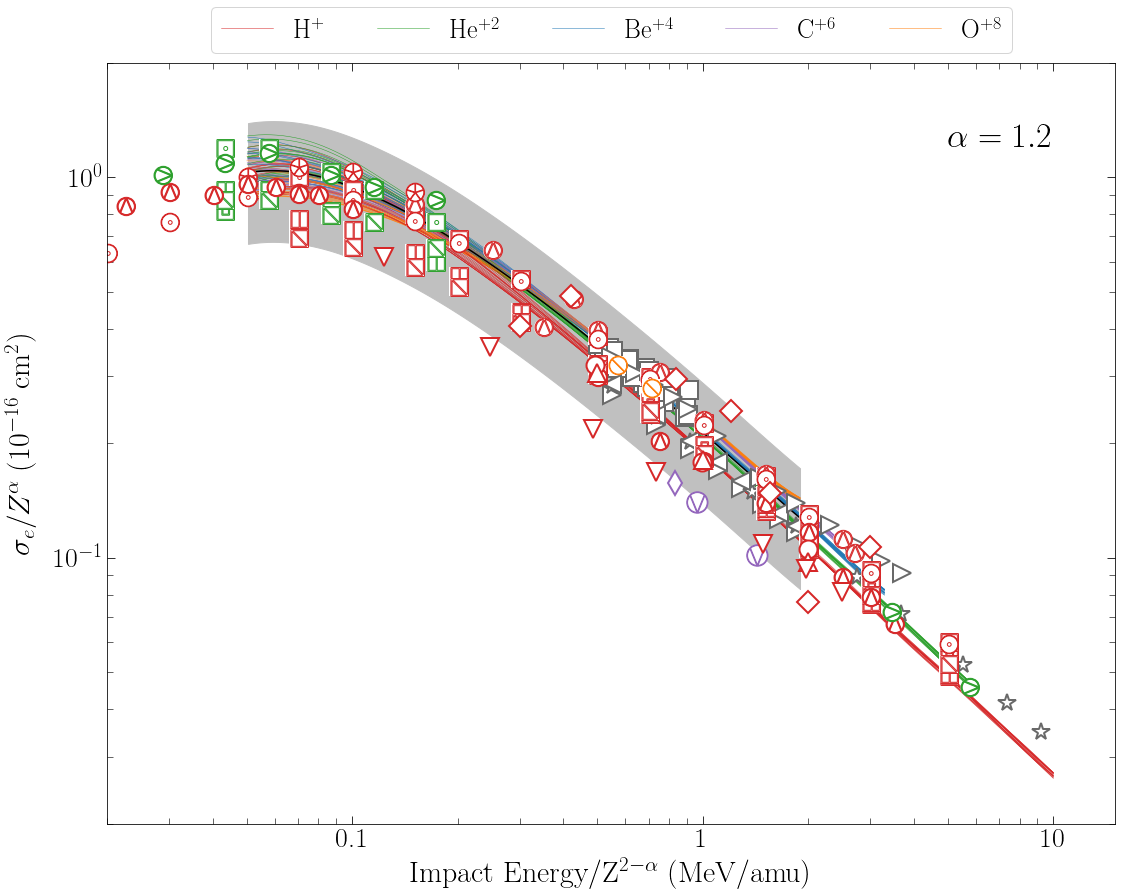

In [15]:
ymin=0.02
ymax=2
xmin=0.02
xmax=15
xtext=5
ytext=10
icharge=65/1000
iwidth=0.5
ims=20
imew=1.0

fig = plt.figure(figsize=(16,14))

ax1 = plt.subplot(111)
plt.text(5., 1.2, r'$\alpha=1.2$',fontsize=imolsize+4)
plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int['SLURACILO'][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[0],
         co_p,linewidth=iwidth, label=r'H$^+$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int['SLURACILO'][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[0],
         co_he,linewidth=iwidth, label=r'He$^{+2}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int['SLURACILO'][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[0],
         co_be,linewidth=iwidth, label=r'Be$^{+4}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int['SLURACILO'][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[0],
         co_c,linewidth=iwidth, label=r'C$^{+6}$')
plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int['SLURACILO'][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[0],
         co_o,linewidth=iwidth, label=r'O$^{+8}$')

ax1.legend(loc='upper left',bbox_to_anchor=(0.09, 1.09, 0, 0),fontsize=ilegsize,ncol=5)

it=0
for i in head_adn[1:]:
    plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

it=0
for i in head_CHn[1:]:
    plt.plot(convMeV(PS2int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS2int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_CHn[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS2int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS2int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_CHn[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS2int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS2int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_CHn[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS2int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS2int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_CHn[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS2int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS2int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_CHn[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

it=0
for i in head_PYR[1:]:
    plt.plot(convMeV(PS3int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS3int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_PYR[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS3int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_PYR[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS3int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_PYR[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS3int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_PYR[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS3int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_PYR[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

# water
plt.plot(convMeV(PS4int['Energy'][iPe100:])/1**(2-alpha),PS4int['H2O'][iPe100:]*convcm2/1**(alpha)/6,co_p,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS4int['Energy'][iHe100:])/2**(2-alpha),HeS4int['H2O'][iHe100:]*convcm2/2**(alpha)/6,co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS4int['Energy'][iBe100:])/4**(2-alpha),BeS4int['H2O'][iBe100:]*convcm2/4**(alpha)/6,co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS4int['Energy'][iCe100:])/6**(2-alpha),CS4int['H2O'][iCe100:]*convcm2/6**(alpha)/6,co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(OS4int['Energy'][iOe100:])/8**(2-alpha),OS4int['H2O'][iOe100:]*convcm2/8**(alpha)/6,co_o,linewidth=iwidth, label='_nolegend_')

# # valores medios por ion
# plt.plot(resP['ENERGY'][iPe100:],resP['AVG'][iPe100:],color=co_p)
# plt.plot(resHe['ENERGY'][iHe100:],resHe['AVG'][iHe100:],color=co_he)
# plt.plot(resBe['ENERGY'][iBe100:],resBe['AVG'][iBe100:],color=co_be)
# plt.plot(resC['ENERGY'][iCe100:],resC['AVG'][iCe100:],color=co_c)
# plt.plot(resO['ENERGY'][iOe100:],resO['AVG'][iOe100:],color=co_o)

errcte=0.35
# valor medio total
xmean=resP['ENERGY'][iPe100:]
ymean=xtarg['AVG'][iPe100:]
dymean=xtarg['AVG'][iPe100:]*errcte
plt.plot(xmean,ymean,color='k')
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')

# experiments:

# electrons
Ae, = plt.plot(A_e['Ep'][0:iAe]/1000.,A_e['CS'][0:iAe]/45,color='dimgray',
               marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=6,
               linestyle=' ')
Cite,=plt.plot(C_e['Ep'][iCe:]/1000,C_e['CS'][iCe:]/37,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ',label='e')
Tyme, = plt.plot(T_e['Ep'][0:iTe]/1000,T_e['CS'][0:iTe]/42,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
Guane,=plt.plot(G_e['Ep'][0:iGe]/1000,G_e['CS'][0:iGe]/49,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
PYRe, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+PY']/28,color='dimgray',
        marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
        linestyle=' ')
THFe09, = plt.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS']/28,color='dimgray',
          marker='*',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe17, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+THF']/28,color='dimgray',
          marker='<',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe19, = plt.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]/28*convcm2,color='dimgray',
          marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')

# gases + H1+
plt.plot(gasesH1['E'],gasesH1['N2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2p, = plt.plot(gasesH1['E'],gasesH1['N2'],color=co_p,
                marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['O2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2p, = plt.plot(gasesH1['E'],gasesH1['O2'],color=co_p,
                marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COp, = plt.plot(gasesH1['E'],gasesH1['CO'],color=co_p,
                marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2p, = plt.plot(gasesH1['E'],gasesH1['CO2'],color=co_p,
                 marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_p['E'],CH4_p['TCS']/8,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p, = plt.plot(CH4_p['E'],CH4_p['TCS']/8,color=co_p,
                   marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# gases + He2+
plt.plot(gasesHe2['E'],gasesHe2['N2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2he, = plt.plot(gasesHe2['E'],gasesHe2['N2'],color=co_he,
                 marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COhe, = plt.plot(gasesHe2['E'],gasesHe2['CO'],color=co_he,
                 marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['O2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2he, = plt.plot(gasesHe2['E'],gasesHe2['O2'],color=co_he,
                 marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2he, = plt.plot(gasesHe2['E'],gasesHe2['CO2'],color=co_he,
                  marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4he85, = plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color=co_he,
                    marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# methane
plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_he,
         marker='o',markersize=ims-1,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p19, = plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_p,
                    marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# water
plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op85, = plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color=co_p,
                   marker=r'$\odot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op86, = plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color=co_p,
                    marker=r'$\logof$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op07, = plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color=co_p,
                    marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_85, = plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color=co_he,
                    marker=r'$\varogreaterthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_05, = plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color=co_he,
                    marker=r'$\varogreaterthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='white',
#          marker='o',markersize=ims-2,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
# H2Oli16, = plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='tab:olive',
#                     marker=r'$\varoast$',markersize=ims,markeredgewidth=imew*1.,linestyle=' ')

plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_09, = plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color=co_c,
        marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_17, = plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color=co_c,
            marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Oo, = plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color=co_o,
                    marker=r'$\obslash$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# DNA and RNA
Ap, = plt.plot(A_p['E']/1000,A_p['CS']/45,color=co_p,
               marker='o',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
Up, = plt.plot(U_p['E']/1000,U_p['CS']/36,color=co_p,
               marker='^',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
PYRp, = plt.plot(PYR_p['E']/1000,PYR_p['au']/28*convcm2,color=co_p,
                 marker='v',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
THFp, = plt.plot(THF_p['Ep']/1000,THF_p['au']/28*convcm2,color=co_p,
                 marker='D',markersize=ims-4,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
AC, = plt.plot(A_C[0]/6**(2-alpha),A_C[1]/6**(alpha)/45,color=co_c,
               marker='d',markersize=ims-3,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')

plt.xlabel(r"Impact Energy/Z$^{2-\alpha}$ (MeV/amu)", fontsize=ilabelsize,labelpad=5)
plt.ylabel(r"$\sigma_e/Z^{\alpha}$ ($10^{-16}$ cm$^2$)", fontsize=ilabelsize,labelpad=15)
ax1.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, left=True, right=True);
ax1.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax) 
plt.yscale('log')
plt.xscale('log')
ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
# ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

plt.subplots_adjust(left=0.1, right=0.975)

plt.savefig("../error1.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


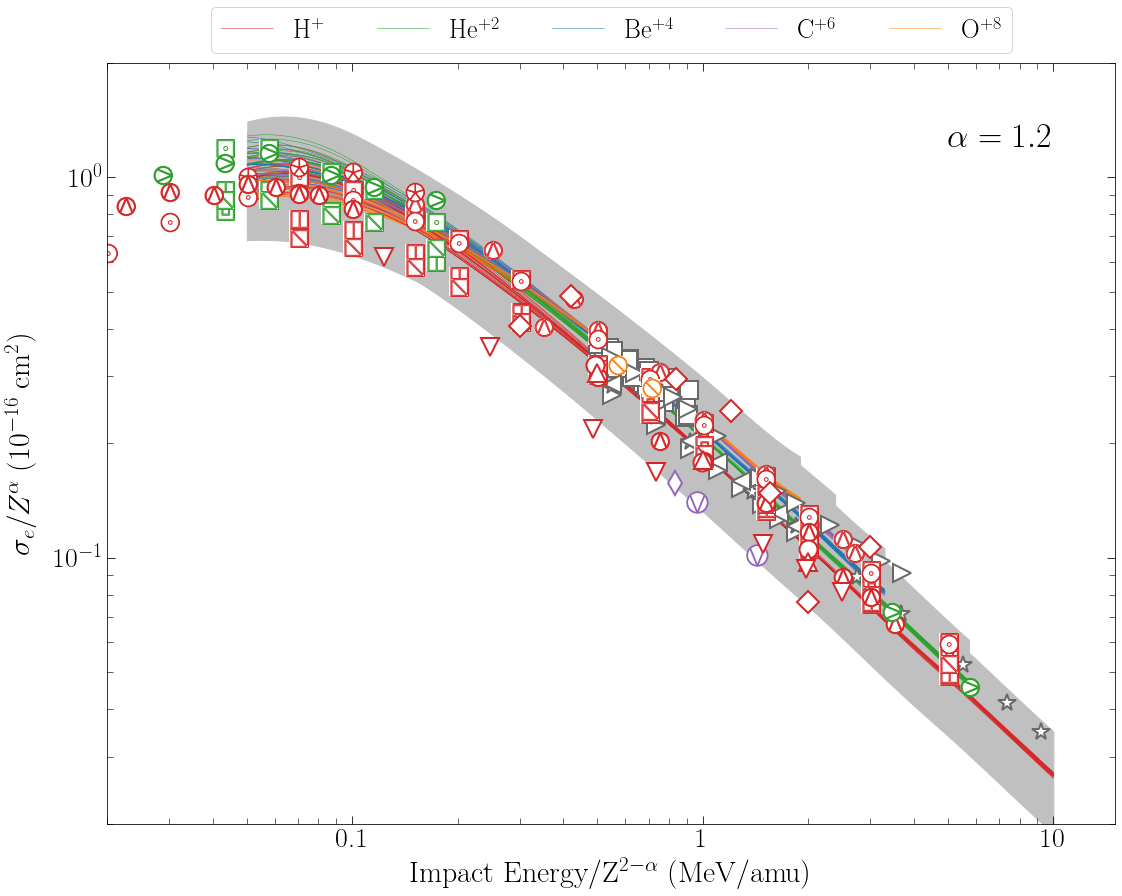

In [20]:
ymin=0.02
ymax=2
xmin=0.02
xmax=15
xtext=5
ytext=10
icharge=65/1000
iwidth=0.5
ims=20
imew=1.0

fig = plt.figure(figsize=(16,14))

ax1 = plt.subplot(111)
plt.text(5., 1.2, r'$\alpha=1.2$',fontsize=imolsize+4)
plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int['SLURACILO'][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[0],
         co_p,linewidth=iwidth, label=r'H$^+$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int['SLURACILO'][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[0],
         co_he,linewidth=iwidth, label=r'He$^{+2}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int['SLURACILO'][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[0],
         co_be,linewidth=iwidth, label=r'Be$^{+4}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int['SLURACILO'][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[0],
         co_c,linewidth=iwidth, label=r'C$^{+6}$')
plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int['SLURACILO'][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[0],
         co_o,linewidth=iwidth, label=r'O$^{+8}$')

ax1.legend(loc='upper left',bbox_to_anchor=(0.09, 1.09, 0, 0),fontsize=ilegsize,ncol=5)

it=0
for i in head_adn[1:]:
    plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

it=0
for i in head_CHn[1:]:
    plt.plot(convMeV(PS2int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS2int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_CHn[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS2int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS2int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_CHn[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS2int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS2int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_CHn[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS2int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS2int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_CHn[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS2int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS2int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_CHn[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

it=0
for i in head_PYR[1:]:
    plt.plot(convMeV(PS3int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS3int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_PYR[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS3int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_PYR[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS3int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_PYR[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS3int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_PYR[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS3int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_PYR[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

# water
plt.plot(convMeV(PS4int['Energy'][iPe100:])/1**(2-alpha),PS4int['H2O'][iPe100:]*convcm2/1**(alpha)/6,co_p,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS4int['Energy'][iHe100:])/2**(2-alpha),HeS4int['H2O'][iHe100:]*convcm2/2**(alpha)/6,co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS4int['Energy'][iBe100:])/4**(2-alpha),BeS4int['H2O'][iBe100:]*convcm2/4**(alpha)/6,co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS4int['Energy'][iCe100:])/6**(2-alpha),CS4int['H2O'][iCe100:]*convcm2/6**(alpha)/6,co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(OS4int['Energy'][iOe100:])/8**(2-alpha),OS4int['H2O'][iOe100:]*convcm2/8**(alpha)/6,co_o,linewidth=iwidth, label='_nolegend_')

errcte=0.30
# # valores medios por ion
xmean=resP['ENERGY'][iPe100:]
ymean=resP['AVG'][iPe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_p)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resHe['ENERGY'][iHe100:]
ymean=resHe['AVG'][iHe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_he)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resBe['ENERGY'][iBe100:]
ymean=resBe['AVG'][iBe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_be)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resC['ENERGY'][iCe100:]
ymean=resC['AVG'][iCe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_c)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resO['ENERGY'][iOe100:]
ymean=resO['AVG'][iOe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_o)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')

# experiments:

# electrons
Ae, = plt.plot(A_e['Ep'][0:iAe]/1000.,A_e['CS'][0:iAe]/45,color='dimgray',
               marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=6,
               linestyle=' ')
Cite,=plt.plot(C_e['Ep'][iCe:]/1000,C_e['CS'][iCe:]/37,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ',label='e')
Tyme, = plt.plot(T_e['Ep'][0:iTe]/1000,T_e['CS'][0:iTe]/42,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
Guane,=plt.plot(G_e['Ep'][0:iGe]/1000,G_e['CS'][0:iGe]/49,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
PYRe, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+PY']/28,color='dimgray',
        marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
        linestyle=' ')
THFe09, = plt.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS']/28,color='dimgray',
          marker='*',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe17, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+THF']/28,color='dimgray',
          marker='<',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe19, = plt.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]/28*convcm2,color='dimgray',
          marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')

# gases + H1+
plt.plot(gasesH1['E'],gasesH1['N2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2p, = plt.plot(gasesH1['E'],gasesH1['N2'],color=co_p,
                marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['O2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2p, = plt.plot(gasesH1['E'],gasesH1['O2'],color=co_p,
                marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COp, = plt.plot(gasesH1['E'],gasesH1['CO'],color=co_p,
                marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2p, = plt.plot(gasesH1['E'],gasesH1['CO2'],color=co_p,
                 marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_p['E'],CH4_p['TCS']/8,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p, = plt.plot(CH4_p['E'],CH4_p['TCS']/8,color=co_p,
                   marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# gases + He2+
plt.plot(gasesHe2['E'],gasesHe2['N2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2he, = plt.plot(gasesHe2['E'],gasesHe2['N2'],color=co_he,
                 marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COhe, = plt.plot(gasesHe2['E'],gasesHe2['CO'],color=co_he,
                 marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['O2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2he, = plt.plot(gasesHe2['E'],gasesHe2['O2'],color=co_he,
                 marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2he, = plt.plot(gasesHe2['E'],gasesHe2['CO2'],color=co_he,
                  marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4he85, = plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color=co_he,
                    marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# methane
plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_he,
         marker='o',markersize=ims-1,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p19, = plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_p,
                    marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# water
plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op85, = plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color=co_p,
                   marker=r'$\odot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op86, = plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color=co_p,
                    marker=r'$\logof$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op07, = plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color=co_p,
                    marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_85, = plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color=co_he,
                    marker=r'$\varogreaterthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_05, = plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color=co_he,
                    marker=r'$\varogreaterthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='white',
#          marker='o',markersize=ims-2,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
# H2Oli16, = plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='tab:olive',
#                     marker=r'$\varoast$',markersize=ims,markeredgewidth=imew*1.,linestyle=' ')

plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_09, = plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color=co_c,
        marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_17, = plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color=co_c,
            marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Oo, = plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color=co_o,
                    marker=r'$\obslash$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# DNA and RNA
Ap, = plt.plot(A_p['E']/1000,A_p['CS']/45,color=co_p,
               marker='o',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
Up, = plt.plot(U_p['E']/1000,U_p['CS']/36,color=co_p,
               marker='^',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
PYRp, = plt.plot(PYR_p['E']/1000,PYR_p['au']/28*convcm2,color=co_p,
                 marker='v',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
THFp, = plt.plot(THF_p['Ep']/1000,THF_p['au']/28*convcm2,color=co_p,
                 marker='D',markersize=ims-4,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
AC, = plt.plot(A_C[0]/6**(2-alpha),A_C[1]/6**(alpha)/45,color=co_c,
               marker='d',markersize=ims-3,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')

plt.xlabel(r"Impact Energy/Z$^{2-\alpha}$ (MeV/amu)", fontsize=ilabelsize,labelpad=5)
plt.ylabel(r"$\sigma_e/Z^{\alpha}$ ($10^{-16}$ cm$^2$)", fontsize=ilabelsize,labelpad=15)
ax1.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, left=True, right=True);
ax1.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax) 
plt.yscale('log')
plt.xscale('log')
ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
# ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

plt.subplots_adjust(left=0.1, right=0.975)

plt.savefig("../zmol-werror.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


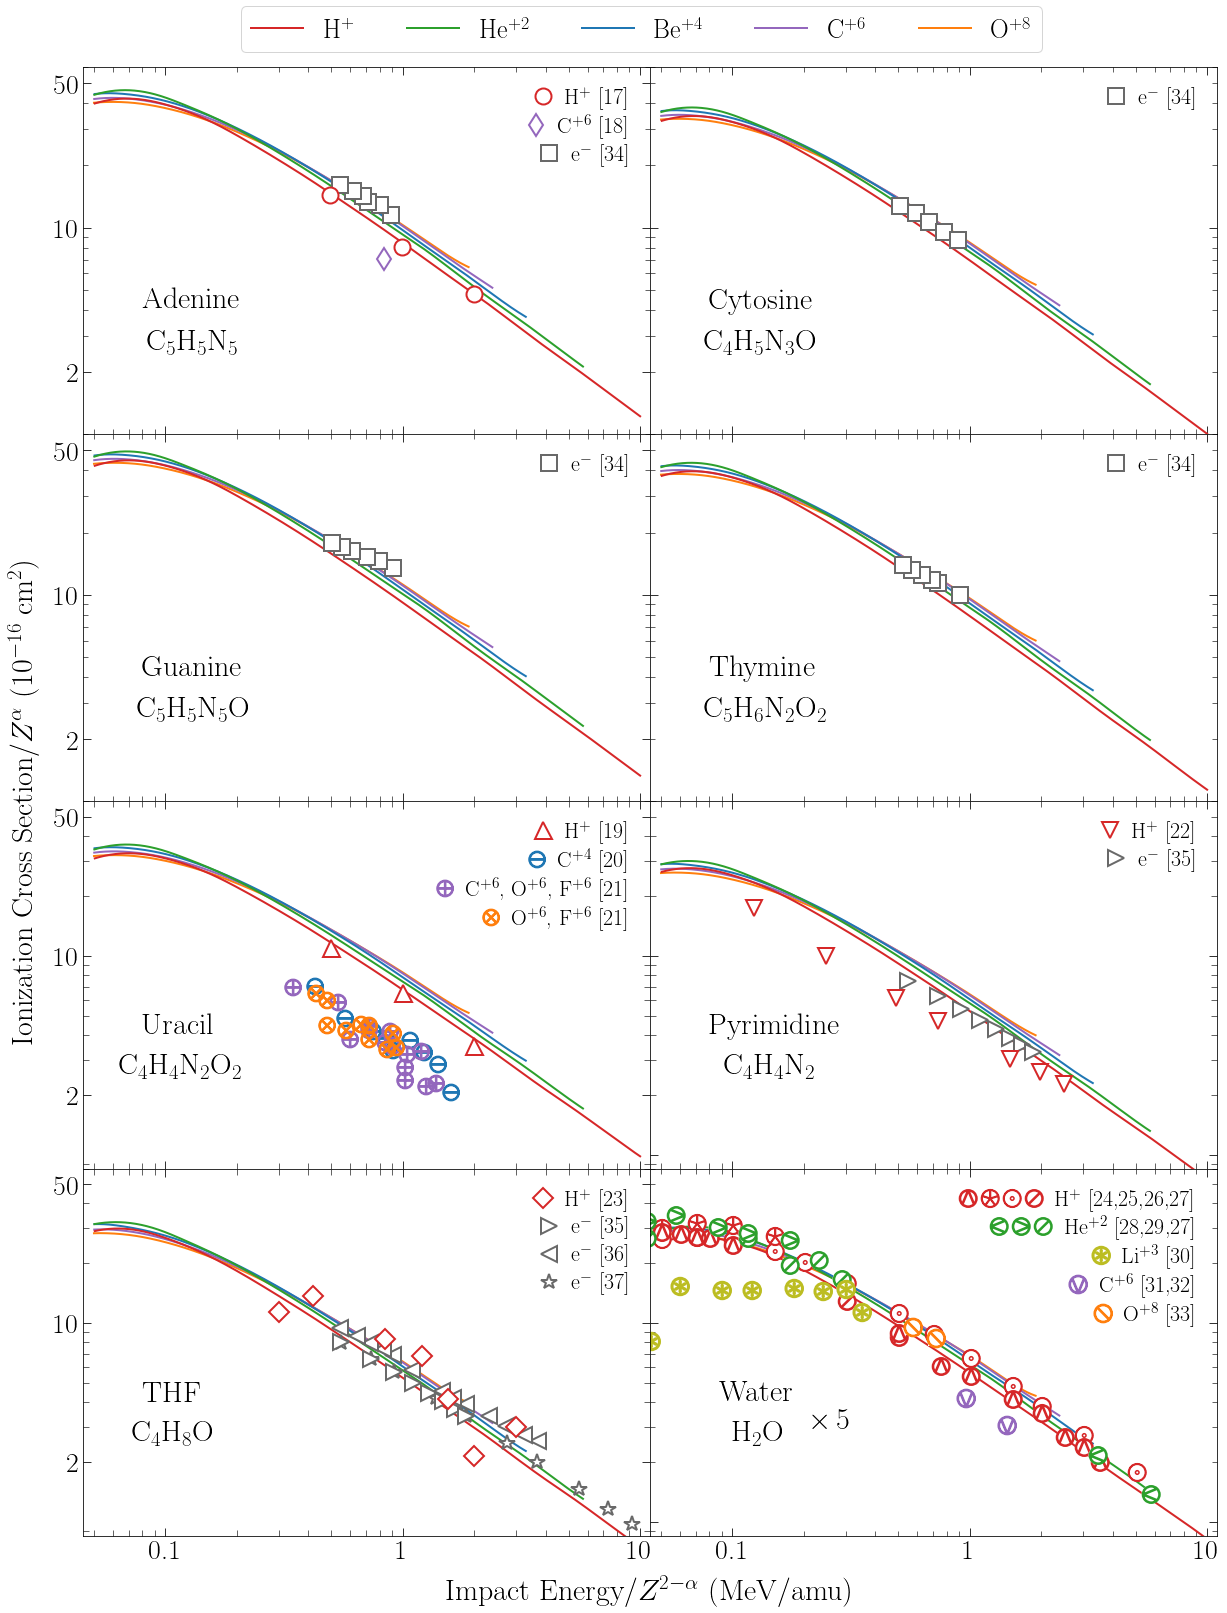

In [6]:
iwidth=2
xmin=0.045
xmax=11
ymin1=1
ymin2=0.85
ymax1=60
ymax2=60
xtext=0.08
ytext=0.09*45
icharge=0.07
ims=16
imew=2

fig = plt.figure(figsize=(18,24))

### ADENINA ###########################################################
ax1 = plt.subplot(421)
plt.text(xtext, ytext, 'Adenine',fontsize=imolsize)
plt.text(xtext*1.05, ytext*0.6, r'C$_5$H$_5$N$_5$',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLADENINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLADENINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLADENINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLADENINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLADENINA'][iPe100:]*convcm2,
         co_p,linewidth=iwidth,label=r'H$^{+}$')

# experimentos #
Ae, = ax1.plot(A_e['Ep'][0:iAe]/1000.,A_e['CS'][0:iAe],color='dimgray',
               marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=6,
               linestyle=' ',label='_nolegend_')
Ap, = ax1.plot(A_p['E']/1000.,A_p['CS'],color=co_p,marker='o',
               markersize=ims,markeredgewidth=imew,markerfacecolor='white',
               linestyle=' ',label='_nolegend_')
AC, = ax1.plot(A_C[0]/6**(2-alpha),A_C[1]/6**(alpha),color=co_c,marker='d',
               markersize=ims,markeredgewidth=imew,markerfacecolor='white',
               linestyle=' ',label='_nolegend_')

handles, labels = ax1.get_legend_handles_labels()
legend1=ax1.legend(handles[::-1], labels[::-1],loc='upper left',bbox_to_anchor=(0.255, 1.2, 0, 0),
                   fontsize=ilegsize,ncol=6)
ax1leg=ax1.legend([Ap,AC,Ae],['H$^{+}$ [17]',r'C$^{+6}$ [18]','e$^{-}$ [34]'],
                  loc='upper right', bbox_to_anchor=(1,1),fontsize=22,markerfirst=True,
                  handletextpad=0.01,labelspacing=0.25,frameon=False)
vp=ax1leg._legend_box._children[-1]._children[0]
vp.align="right"

ax1.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax1.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
plt.gca().add_artist(legend1)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
plt.yticks(np.array([2,10,50]), [2,10,50])
    
### CITOSINA ###########################################################
ax2 = plt.subplot(422)
plt.text(xtext, ytext, 'Cytosine',fontsize=imolsize)
plt.text(xtext*0.95, ytext*0.6, r'C$_4$H$_5$N$_3$O',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLCITOSINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLCITOSINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLCITOSINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLCITOSINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLCITOSINA'][iPe100:]*convcm2,co_p,linewidth=iwidth, 
         label='_nolegend_')

# experimentos #
Cite,=plt.plot(C_e['Ep'][iCe:]/1000,C_e['CS'][iCe:],color='dimgray',
         marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=4,
         linestyle=' ',label='e')

ax2leg=ax2.legend([Cite],['e$^{-}$ [34]'],
                  loc='upper right', bbox_to_anchor=(1,1),fontsize=22,markerfirst=True,
                  handletextpad=0.01,labelspacing=0.25,frameon=False)
vp=ax2leg._legend_box._children[-1]._children[0]
vp.align="right"

ax2.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax2.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
# ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### GUANINA ###########################################################
ax3 = plt.subplot(423)
plt.text(xtext, ytext, 'Guanine',fontsize=imolsize)
plt.text(xtext*0.95, ytext*0.6, r'C$_5$H$_5$N$_5$O',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLGUANINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLGUANINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLGUANINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLGUANINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLGUANINA'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experimentos #
Guane,=plt.plot(G_e['Ep'][0:iGe]/1000,G_e['CS'][0:iGe],color='dimgray',
         marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=4,
         linestyle=' ')

ax3leg=ax3.legend([Guane],['e$^{-}$ [34]'],
                  loc='upper right', bbox_to_anchor=(1,1),fontsize=22,markerfirst=True,
                  handletextpad=0.01,labelspacing=0.25,frameon=False)
vp=ax3leg._legend_box._children[-1]._children[0]
vp.align="right"

ax3.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax3.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
ax3.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
ax3.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
plt.yticks(np.array([2,10,50]), [2,10,50])

### TIMINA ###########################################################
ax4 = plt.subplot(424)
plt.text(xtext, ytext, 'Thymine',fontsize=imolsize)
plt.text(xtext*0.95, ytext*0.6, r'C$_5$H$_6$N$_2$O$_2$',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLTIMINA'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLTIMINA'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLTIMINA'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLTIMINA'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLTIMINA'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experimentos #
Tyme, = plt.plot(T_e['Ep'][0:iTe]/1000,T_e['CS'][0:iTe],color='dimgray',
         marker='s',markersize=ims,markeredgewidth=imew,markerfacecolor='white',markevery=4,
         linestyle=' ')

ax4leg=ax4.legend([Tyme],['e$^{-}$ [34]'],
                  loc='upper right', bbox_to_anchor=(1,1),fontsize=22,markerfirst=True,
                  handletextpad=0.01,labelspacing=0.25,frameon=False)
vp=ax4leg._legend_box._children[-1]._children[0]
vp.align="right"

ax4.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True,
                left=True, right=True);
ax4.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin1,ymax1)
plt.yscale('log')
plt.xscale('log')
ax4.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

### URACILO ###########################################################
ax5 = plt.subplot(425)
plt.text(xtext, ytext, 'Uracil',fontsize=imolsize)
plt.text(xtext*0.8, ytext*0.6, r'C$_4$H$_4$N$_2$O$_2$',fontsize=imolsize)

plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/8**(2-alpha),OS1int['SLURACILO'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/6**(2-alpha),CS1int['SLURACILO'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/4**(2-alpha),BeS1int['SLURACILO'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/2**(2-alpha),HeS1int['SLURACILO'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convMeV(PS1int['ENERGY'][iPe100:]),PS1int['SLURACILO'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label=r'H$^{+}$')

# experiments
Up, = ax5.plot(U_p['E']/1000,U_p['CS'],color=co_p,
               marker='^',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
               label='_nolegend_')
Uc4, = ax5.plot(U_c4[1]/1000/4**(2-alpha),U_c4[3]*4**(2-alpha),color=co_be,
                marker=r'$\ominus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uc6, = ax5.plot(U_c6[1]/1000/6**(2-alpha),U_c6[2]*6**(2-alpha),color=co_c,
                marker=r'$\oplus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uo6, = ax5.plot(U_o6[1]/1000/6**(2-alpha),U_o6[3]*6**(2-alpha),color=co_c,
                marker=r'$\oplus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uf6, = ax5.plot(U_f6[1]/1000/6**(2-alpha),U_f6[2]*6**(2-alpha),color=co_c,
                marker=r'$\oplus$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                linestyle=' ',label='_nolegend_')
Uof8, = ax5.plot(U_of8[0]/1000/8**(2-alpha),U_of8[1]*8**(2-alpha),color=co_o,
                 marker=r'$\otimes$',markersize=ims+1,markeredgewidth=imew,markerfacecolor='white',
                 linestyle=' ',label='_nolegend_')

ax5leg=ax5.legend([Up,Uc4,Uc6,Uof8],['H$^{+}$ [19]','C$^{+4}$ [20]','C$^{+6}$, O$^{+6}$, F$^{+6}$ [21]',
                                     'O$^{+6}$, F$^{+6}$ [21]'],
           loc='upper right', bbox_to_anchor=(1,1),fontsize=22,markerfirst=True,
           handletextpad=0.01,labelspacing=0.25,frameon=False)
vp=ax5leg._legend_box._children[-1]._children[0]
vp.align="right"

plt.ylabel(r"Ionization Cross Section/$Z^{\alpha}$ ($10^{-16}$ cm$^2$)", fontsize=ilabelsize,
           labelpad=15,position=(1,1))
ax5.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True,
                left=True, right=True);
ax5.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')
ax5.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
plt.yticks(np.array([2,10,50]), [2,10,50])

### PYRIMIDINA ###########################################################
ax6 = plt.subplot(426)
plt.text(xtext, ytext, 'Pyrimidine',fontsize=imolsize)
plt.text(xtext*1.15, ytext*0.6, r'C$_4$H$_4$N$_2$',fontsize=imolsize)

plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/8**(2-alpha),OS3int['SLC4H4N2'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/6**(2-alpha),CS3int['SLC4H4N2'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/4**(2-alpha),BeS3int['SLC4H4N2'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/2**(2-alpha),HeS3int['SLC4H4N2'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS3int['ENERGY'][iPe100:]),PS3int['SLC4H4N2'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experiments
PYRe, = ax6.plot(bug17['Ep(keV)']/1000,bug17['e+PY'],color='dimgray',
                 marker='>',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                 label='p')
PYRp, = ax6.plot(PYR_p['E']/1000,PYR_p['au']*convcm2,color=co_p,
                 marker='v',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                 label='p')

ax6leg=ax6.legend([PYRp,PYRe],['H$^{+}$ [22]','e$^{-}$ [35]'],
                  loc='upper right', bbox_to_anchor=(1,1),fontsize=22,markerfirst=True,
                  handletextpad=0.01,labelspacing=0.25,frameon=False)
vp=ax6leg._legend_box._children[-1]._children[0]
vp.align="right"

ax6.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True,
                left=True, right=True);
ax6.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')

### THF ###########################################################
ax7 = plt.subplot(427)
plt.text(xtext, ytext, 'THF',fontsize=imolsize)
plt.text(xtext*0.9, ytext*0.6, r'C$_4$H$_8$O',fontsize=imolsize)

plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/8**(2-alpha),OS3int['SLC4H8O1'][iOe100:]*convcm2/8**(alpha),
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/6**(2-alpha),CS3int['SLC4H8O1'][iCe100:]*convcm2/6**(alpha),
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/4**(2-alpha),BeS3int['SLC4H8O1'][iBe100:]*convcm2/4**(alpha),
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/2**(2-alpha),HeS3int['SLC4H8O1'][iHe100:]*convcm2/2**(alpha),
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS3int['ENERGY'][iPe100:]),PS3int['SLC4H8O1'][iPe100:]*convcm2,co_p,linewidth=iwidth,
         label='_nolegend_')

# experiments
THFe09, = ax7.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS'],color='dimgray',
                   marker='*',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                   label='p')
THFe17, = ax7.plot(bug17['Ep(keV)']/1000,bug17['e+THF'],color='dimgray',
                   marker='>',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                   label='p')
THFe19, = ax7.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]*convcm2,color='dimgray',
                   marker='<',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                   label='p')
THFp, = ax7.plot(THF_p['Ep']/1000,THF_p['au']*convcm2,color=co_p,
                 marker='D',markersize=ims-2,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',
                 label='p')

ax7leg=ax7.legend([THFp,THFe17,THFe19,THFe09],['H$^+$ [23]','e$^{-}$ [35]','e$^{-}$ [36]','e$^{-}$ [37]'],
           loc='upper right', bbox_to_anchor=(1,1),fontsize=22,numpoints=1,markerfirst=True,
           handletextpad=0.01,labelspacing=0.25,frameon=False)
vp=ax7leg._legend_box._children[-1]._children[0]
vp.align="right"

ax7.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, 
                left=True, right=True);
ax7.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')
ax7.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
ax7.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
plt.yticks(np.array([2,10,50]), [2,10,50])

### WATER ###########################################################
ax8 = plt.subplot(428)
plt.text(xtext*1.1, ytext, 'Water',fontsize=imolsize)
plt.text(xtext*1.25, ytext*0.6, r'H$_2$O',fontsize=imolsize)
plt.text(xtext*2.7, ytext*0.75, r'$\times\,5$',fontsize=imolsize)

plt.plot(convMeV(OS4int['Energy'][iOe100:])/8**(2-alpha),OS4int['H2O'][iOe100:]*convcm2/8**(alpha)*5,
         co_o,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS4int['Energy'][iCe100:])/6**(2-alpha),CS4int['H2O'][iCe100:]*convcm2/6**(alpha)*5,
         co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS4int['Energy'][iBe100:])/4**(2-alpha),BeS4int['H2O'][iBe100:]*convcm2/4**(alpha)*5,
         co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS4int['Energy'][iHe100:])/2**(2-alpha),HeS4int['H2O'][iHe100:]*convcm2/2**(alpha)*5,
         co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(PS4int['Energy'][iPe100:])/1**(2-alpha),PS4int['H2O'][iPe100:]*convcm2/1**(alpha)*5,
         co_p,linewidth=iwidth, label='_nolegend_')

# experiments
ax8.plot(H2O_p80['E'],H2O_p80['TCS']*5*10,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op80, = ax8.plot(H2O_p80['E'],H2O_p80['TCS']*5*10,color=co_p,
                    marker=r'$\varoslash$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_p85['E'],H2O_p85['TCS']*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op85, = ax8.plot(H2O_p85['E'],H2O_p85['TCS']*5,color=co_p,
                    marker=r'$\odot$',markersize=ims+3,markeredgewidth=imew-0.5,markerfacecolor='white',linestyle=' ',label='__none__')

ax8.plot(H2O_p86['E'],H2O_p86['TCS']*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op86, = ax8.plot(H2O_p86['E'],H2O_p86['TCS']*5,color=co_p,
                    marker=r'$\logof$',markersize=ims+3,markeredgewidth=imew-0.5,markerfacecolor='white',linestyle=' ',label='__none__')

ax8.plot(H2O_p07['E'],H2O_p07['TCS']*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ',label='__none__')
H2Op07, = ax8.plot(H2O_p07['E'],H2O_p07['TCS']*5,color=co_p,
                    marker=r'$\varowedge$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_he2_80['E']/2**(2-alpha),H2O_he2_80['TCS']/2**(alpha)*5*10,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Ohe_80, = ax8.plot(H2O_he2_80['E']/2**(2-alpha),H2O_he2_80['TCS']/2**(alpha)*5*10,color=co_he,
                    marker=r'$\varoslash$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Ohe_85, = ax8.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)*5,color=co_he,
                    marker=r'$\varogreaterthan$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Ohe_05, = ax8.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)*5,color=co_he,
                    marker=r'$\varolessthan$',markersize=ims+3,markeredgewidth=imew-0.5,linestyle=' ',label='__none__')

ax8.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oli16, = ax8.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)*5,color='tab:olive',
                    marker=r'$\varoast$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oc6_09, = ax8.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)*5,color=co_c,
                    marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)*5,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oc6_17, = ax8.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)*5,color=co_c,
                    marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)*5,color='white',
         marker='s',markersize=ims-3,markeredgewidth=imew,markerfacecolor='white',linestyle=' ',label='__none__')
H2Oo, = ax8.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)*5,color=co_o,
                    marker=r'$\obslash$',markersize=ims+3,markeredgewidth=imew,linestyle=' ',label='__none__')

ax8leg=ax8.legend([(H2Op07,H2Op86,H2Op85,H2Op80),(H2Ohe_05,H2Ohe_85,H2Ohe_80),H2Oli16,H2Oc6_09,H2Oo],
           [r'H$^+$ [24,25,26,27]',r'He$^{+2}$ [28,29,27]',r'Li$^{+3}$ [30]','C$^{+6}$ [31,32]',
            'O$^{+8}$ [33]'],
           loc='upper right', bbox_to_anchor=(1,1),fontsize=22,markerfirst=True,
           handletextpad=0.01,labelspacing=0.25,frameon=False,
           handler_map={H2Op07:HandlerXoffset(x_offset=66,numpoints=1),
                        H2Op86:HandlerXoffset(x_offset=44,numpoints=1),
                        H2Op85:HandlerXoffset(x_offset=22,numpoints=1),
                        H2Op80:HandlerXoffset(x_offset=0,numpoints=1),
                        H2Ohe_05:HandlerXoffset(x_offset=44,numpoints=1),
                        H2Ohe_85:HandlerXoffset(x_offset=22,numpoints=1),
                        H2Ohe_80:HandlerXoffset(x_offset=0,numpoints=1),
                        H2Oli16:HandlerXoffset(x_offset=0,numpoints=1),
                        H2Oc6_09:HandlerXoffset(x_offset=0,numpoints=1),
                        H2Oo:HandlerXoffset(x_offset=0,numpoints=1)})
vp=ax8leg._legend_box._children[-1]._children[0]
vp.align="right"


plt.xlabel(r"Impact Energy/$Z^{2-\alpha}$ (MeV/amu)", fontsize=ilabelsize,labelpad=10,position=(0,0))
ax8.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, left=True, right=True);
ax8.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);

plt.xlim(xmin,xmax)
plt.ylim(ymin2,ymax2)
plt.yscale('log')
plt.xscale('log')
ax8.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

for ax in fig.get_axes():
    ax.label_outer()
fig.subplots_adjust(hspace=0.0, wspace=0.0)

plt.subplots_adjust(left=0.1, right=0.975, top=0.925, bottom=0.075)
plt.savefig('../zscale_alpha-wref.eps')
plt.show()

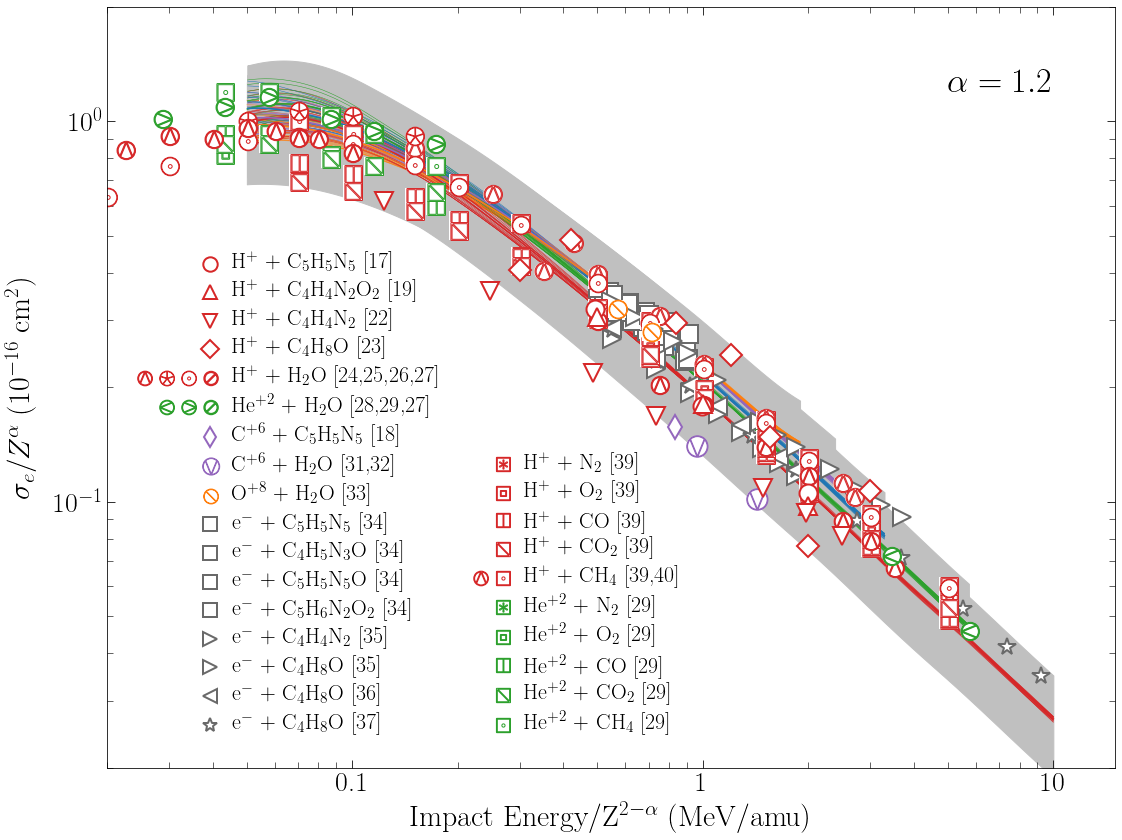

In [7]:
ymin=0.02
ymax=2
xmin=0.02
xmax=15
xtext=5
ytext=10
icharge=65/1000
iwidth=0.5
ims=20
imew=1.0

fig = plt.figure(figsize=(16,14))

ax1 = plt.subplot(111)
plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int['SLURACILO'][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[0],
         co_p,linewidth=iwidth, label=r'H$^+$')
plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int['SLURACILO'][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[0],
         co_he,linewidth=iwidth, label=r'He$^{+2}$')
plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int['SLURACILO'][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[0],
         co_be,linewidth=iwidth, label=r'Be$^{+4}$')
plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int['SLURACILO'][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[0],
         co_c,linewidth=iwidth, label=r'C$^{+6}$')
plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int['SLURACILO'][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[0],
         co_o,linewidth=iwidth, label=r'O$^{+8}$')

ax1.legend(loc='upper left',bbox_to_anchor=(0.09, 1.09, 0, 0),fontsize=ilegsize,ncol=5)

it=0
for i in head_adn[1:]:
    plt.plot(convMeV(PS1int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS1int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_adn[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS1int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS1int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_adn[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS1int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS1int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_adn[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS1int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS1int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_adn[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS1int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS1int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_adn[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

it=0
for i in head_CHn[1:]:
    plt.plot(convMeV(PS2int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS2int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_CHn[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS2int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS2int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_CHn[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS2int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS2int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_CHn[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS2int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS2int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_CHn[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS2int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS2int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_CHn[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

it=0
for i in head_PYR[1:]:
    plt.plot(convMeV(PS3int['ENERGY'][iPe100:])/Zch[0]**(2-alpha),PS3int[i][iPe100:]*convcm2/Zch[0]**alpha/ne_PYR[it],
             co_p,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(HeS3int['ENERGY'][iHe100:])/Zch[1]**(2-alpha),HeS3int[i][iHe100:]*convcm2/Zch[1]**alpha/ne_PYR[it],
             co_he,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(BeS3int['ENERGY'][iBe100:])/Zch[2]**(2-alpha),BeS3int[i][iBe100:]*convcm2/Zch[2]**alpha/ne_PYR[it],
             co_be,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(CS3int['ENERGY'][iCe100:])/Zch[3]**(2-alpha),CS3int[i][iCe100:]*convcm2/Zch[3]**alpha/ne_PYR[it],
             co_c,linewidth=iwidth, label='_nolegend_')
    plt.plot(convMeV(OS3int['ENERGY'][iOe100:])/Zch[4]**(2-alpha),OS3int[i][iOe100:]*convcm2/Zch[4]**alpha/ne_PYR[it],
             co_o,linewidth=iwidth, label='_nolegend_')
    it=it+1

# water
plt.plot(convMeV(PS4int['Energy'][iPe100:])/1**(2-alpha),PS4int['H2O'][iPe100:]*convcm2/1**(alpha)/6,co_p,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(HeS4int['Energy'][iHe100:])/2**(2-alpha),HeS4int['H2O'][iHe100:]*convcm2/2**(alpha)/6,co_he,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(BeS4int['Energy'][iBe100:])/4**(2-alpha),BeS4int['H2O'][iBe100:]*convcm2/4**(alpha)/6,co_be,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(CS4int['Energy'][iCe100:])/6**(2-alpha),CS4int['H2O'][iCe100:]*convcm2/6**(alpha)/6,co_c,linewidth=iwidth, label='_nolegend_')
plt.plot(convMeV(OS4int['Energy'][iOe100:])/8**(2-alpha),OS4int['H2O'][iOe100:]*convcm2/8**(alpha)/6,co_o,linewidth=iwidth, label='_nolegend_')

errcte=0.30
# # valores medios por ion
xmean=resP['ENERGY'][iPe100:]
ymean=resP['AVG'][iPe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_p)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resHe['ENERGY'][iHe100:]
ymean=resHe['AVG'][iHe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_he)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resBe['ENERGY'][iBe100:]
ymean=resBe['AVG'][iBe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_be)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resC['ENERGY'][iCe100:]
ymean=resC['AVG'][iCe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_c)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')
xmean=resO['ENERGY'][iOe100:]
ymean=resO['AVG'][iOe100:]
dymean=ymean*errcte
plt.plot(xmean,ymean,color=co_o)
plt.fill_between(xmean,ymean-dymean,ymean+dymean,color='silver')

# experiments:

# electrons
Ae, = plt.plot(A_e['Ep'][0:iAe]/1000.,A_e['CS'][0:iAe]/45,color='dimgray',
               marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=6,
               linestyle=' ')
Cite,=plt.plot(C_e['Ep'][iCe:]/1000,C_e['CS'][iCe:]/37,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ',label='e')
Tyme, = plt.plot(T_e['Ep'][0:iTe]/1000,T_e['CS'][0:iTe]/42,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
Guane,=plt.plot(G_e['Ep'][0:iGe]/1000,G_e['CS'][0:iGe]/49,color='dimgray',
         marker='s',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',markevery=4,
         linestyle=' ')
PYRe, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+PY']/28,color='dimgray',
        marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
        linestyle=' ')
THFe09, = plt.plot(THF_e09['Ep(kev)']/1000,THF_e09['CS']/28,color='dimgray',
          marker='*',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe17, = plt.plot(bug17['Ep(keV)']/1000,bug17['e+THF']/28,color='dimgray',
          marker='<',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')
THFe19, = plt.plot(convMeV(THF_e19['v(au)'][0:iTHFe19]),THF_e19['au'][0:iTHFe19]/28*convcm2,color='dimgray',
          marker='>',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',
          linestyle=' ')

# gases + H1+
plt.plot(gasesH1['E'],gasesH1['N2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2p, = plt.plot(gasesH1['E'],gasesH1['N2'],color=co_p,
                marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['O2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2p, = plt.plot(gasesH1['E'],gasesH1['O2'],color=co_p,
                marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COp, = plt.plot(gasesH1['E'],gasesH1['CO'],color=co_p,
                marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesH1['E'],gasesH1['CO2'],color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2p, = plt.plot(gasesH1['E'],gasesH1['CO2'],color=co_p,
                 marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# gases + He2+
plt.plot(gasesHe2['E'],gasesHe2['N2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
N2he, = plt.plot(gasesHe2['E'],gasesHe2['N2'],color=co_he,
                 marker=r'$\boxast$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
COhe, = plt.plot(gasesHe2['E'],gasesHe2['CO'],color=co_he,
                 marker=r'$\boxbar$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['O2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
O2he, = plt.plot(gasesHe2['E'],gasesHe2['O2'],color=co_he,
                 marker=r'$\boxbox$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(gasesHe2['E'],gasesHe2['CO2'],color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CO2he, = plt.plot(gasesHe2['E'],gasesHe2['CO2'],color=co_he,
                  marker=r'$\boxbslash$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# methane
plt.plot(CH4_p['E'],CH4_p['TCS']/8,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p, = plt.plot(CH4_p['E'],CH4_p['TCS']/8,color=co_p,
                   marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_p,
         marker='o',markersize=ims-1,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4p19, = plt.plot(CH4_p19['E'],CH4_p19['TCS']/8,color=co_p,
                    marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color='white',
        marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
CH4he85, = plt.plot(CH4_he85['E']/2**(2-alpha),CH4_he85['TCS']/8/2**(alpha),color=co_he,
                    marker=r'$\boxdot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

# water
plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op85, = plt.plot(H2O_p85['E'],H2O_p85['TCS']/6,color=co_p,
                   marker=r'$\odot$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op86, = plt.plot(H2O_p86['E'],H2O_p86['TCS']/6,color=co_p,
                    marker=r'$\logof$',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')

plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Op07, = plt.plot(H2O_p07['E'],H2O_p07['TCS']/6,color=co_p,
                    marker=r'$\varowedge$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_85, = plt.plot(H2O_he2_85['E']/2**(2-alpha),H2O_he2_85['H2O']/2**(alpha)/6,color=co_he,
                    marker=r'$\varogreaterthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color='white',
         marker='o',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Ohe_05, = plt.plot(H2O_he2_05['E']/2**(2-alpha),H2O_he2_05['H2O']/2**(alpha)/6,color=co_he,
                    marker=r'$\varolessthan$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='white',
#          marker='o',markersize=ims-2,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
# H2Oli16, = plt.plot(H2O_li3['E']/3**(2-alpha),H2O_li3['TCS']/3**(alpha)/6,color='tab:olive',
#                     marker=r'$\varoast$',markersize=ims,markeredgewidth=imew*1.,linestyle=' ')

plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_09, = plt.plot(H2O_c6_09['E']/6**(2-alpha),H2O_c6_09['TCS']/6**(alpha)/6,color=co_c,
        marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color='white',
         marker='o',markersize=ims,markeredgewidth=imew,markerfacecolor='white',linestyle=' ')
H2Oc6_17, = plt.plot(H2O_c6_17['E']/6**(2-alpha),H2O_c6_17['TCS']/6**(alpha)/6,color=co_c,
            marker=r'$\ovee$',markersize=ims+3,markeredgewidth=imew,linestyle=' ')

plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color='white',
         marker='s',markersize=ims-2,markeredgewidth=imew-1,markerfacecolor='white',linestyle=' ')
H2Oo, = plt.plot(H2O_o8['E']/8**(2-alpha),H2O_o8['TCS']/8**(alpha)/6,color=co_o,
                    marker=r'$\obslash$',markersize=ims,markeredgewidth=imew,linestyle=' ')

# DNA and RNA
Ap, = plt.plot(A_p['E']/1000,A_p['CS']/45,color=co_p,
               marker='o',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
AC, = plt.plot(A_C[0]/6**(2-alpha),A_C[1]/6**(alpha)/45,color=co_c,
               marker='d',markersize=ims-3,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
Up, = plt.plot(U_p['E']/1000,U_p['CS']/36,color=co_p,
               marker='^',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
PYRp, = plt.plot(PYR_p['E']/1000,PYR_p['au']/28*convcm2,color=co_p,
                 marker='v',markersize=ims-2,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')
THFp, = plt.plot(THF_p['Ep']/1000,THF_p['au']/28*convcm2,color=co_p,
                 marker='D',markersize=ims-4,markeredgewidth=imew*2,markerfacecolor='white',linestyle=' ')

# legends
leg1=ax1.legend([Ap,Up,PYRp,THFp,
                  (H2Op07,H2Op86,H2Op85,H2Op80),(H2Ohe_05,H2Ohe_85,H2Ohe_80),AC,H2Oc6_09,H2Oo,
                   Ae,Cite,Guane,Tyme,PYRe,THFe19,THFe17,THFe09],
                 ['H$^{+}$ + C$_5$H$_5$N$_5$ [17]',
                  'H$^{+}$ + C$_4$H$_4$N$_2$O$_2$ [19]',
                  'H$^{+}$ + C$_4$H$_4$N$_2$ [22]',
                  'H$^+$ + C$_4$H$_8$O [23]',
                  'H$^+$ + H$_2$O [24,25,26,27]',
                  'He$^{+2}$ + H$_2$O [28,29,27]',
                  'C$^{+6}$ + C$_5$H$_5$N$_5$ [18]',
                  'C$^{+6}$ + H$_2$O [31,32]',
                  'O$^{+8}$ + H$_2$O [33]',
                  'e$^{-}$ + C$_5$H$_5$N$_5$ [34]',
                  'e$^{-}$ + C$_4$H$_5$N$_3$O [34]',
                  'e$^{-}$ + C$_5$H$_5$N$_5$O [34]',
                  'e$^{-}$ + C$_5$H$_6$N$_2$O$_2$ [34]',
                  'e$^{-}$ + C$_4$H$_4$N$_2$ [35]',
                  'e$^{-}$ + C$_4$H$_8$O [35]',
                  'e$^{-}$ + C$_4$H$_8$O [36]',
                  'e$^{-}$ + C$_4$H$_8$O [37]'],
                  loc='lower left', bbox_to_anchor=(0.06,0.015),fontsize=22,markerscale=0.8,markerfirst=True,
                  handletextpad=0.01,labelspacing=0.25,frameon=False,
                  handler_map={H2Op07:HandlerXoffset(x_offset=66,numpoints=1),
                               H2Op86:HandlerXoffset(x_offset=44,numpoints=1),
                               H2Op85:HandlerXoffset(x_offset=22,numpoints=1),
                               H2Op80:HandlerXoffset(x_offset=0,numpoints=1),
                               H2Ohe_05:HandlerXoffset(x_offset=44,numpoints=1),
                               H2Ohe_85:HandlerXoffset(x_offset=22,numpoints=1),
                               H2Ohe_80:HandlerXoffset(x_offset=0,numpoints=1)})
ax1.add_artist(leg1)

leg2=ax1.legend([N2p,O2p,COp,CO2p,(CH4p19,CH4p),
                 N2he,O2he,COhe,CO2he,CH4he85],
                ['H$^{+}$ + N$_2$ [39]','H$^{+}$ + O$_2$ [39]','H$^{+}$ + CO [39]',
                 'H$^{+}$ + CO$_2$ [39]','H$^{+}$ + CH$_4$ [39,40]',
                 'He$^{+2}$ + N$_2$ [29]','He$^{+2}$ + O$_2$ [29]','He$^{+2}$ + CO [29]',
                 'He$^{+2}$ + CO$_2$ [29]','He$^{+2}$ + CH$_4$ [29]'],
                loc='lower left', bbox_to_anchor=(0.35,0.015),fontsize=22,markerscale=0.8,markerfirst=True,
                handletextpad=0.01,labelspacing=0.25,frameon=False,
                handler_map={CH4p19:HandlerXoffset(x_offset=22,numpoints=1),
                             CH4p:HandlerXoffset(x_offset=0,numpoints=1)})

plt.text(5, 1.2, r'$\alpha=1.2$',fontsize=imolsize+4)
plt.xlabel(r"Impact Energy/Z$^{2-\alpha}$ (MeV/amu)", fontsize=ilabelsize,labelpad=5)
plt.ylabel(r"$\sigma_e/Z^{\alpha}$ ($10^{-16}$ cm$^2$)", fontsize=ilabelsize,labelpad=15)
ax1.tick_params(direction='in',which='major',labelsize=itickssize,length=8,bottom=True, top=True, left=True, right=True);
ax1.tick_params(direction='in',which='minor',length=6,bottom=True, top=True, left=True, right=True);
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax) 
plt.yscale('log')
plt.xscale('log')
ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))
# ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,g}'))

plt.subplots_adjust(left=0.1, right=0.975)

plt.savefig("../zmol_werror-wref.eps")
plt.show()